# Retention Project Workbook (Full Data Science Pipeline)

**Target:** retained

**Goals:**
- Discover Drivers of retention through EDA and clustering.
- Use features to run classification models and make predictions

**Deliverables:**
- Work Notebook (Github)
- Report Notebook (Github)
- Wrangle.py (Github)
- README.md (Github)
- Project Summary for README, Report, Portfolio/Resume

**Initial thoughts and hypothesis:**
- Group features into categories
    - Target
        - retained
    - Student Demographics
        - id
        - race_ethn
        - sex
        - fgen
        - age_at_start_term
        - depend_status  
    - Financials
        - pell_ever
        - efc
        - fa_recd
    - Educational Stats
        - enrolled_1_back
        - time_status
        - sutdent_class
        - hs_gpa
        - term_gpa
        - original_type
        - cip_2dig
        - act
        - astd
        - dubya_count_term
        - span
        - days_between
- Educational Stats will probably have the most impact
- age, fgen, depend_status and financial aid will probably also be drivers
- retention is fall to fall and spring to spring

In [1]:
# Import for Data Manipulation
import pandas as pd
import numpy as np 

# Import for Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
import squarify

# Import for data acquisition and prep
import wrangle

# Import for Scaling and Spliting the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Import for hypothesis testing
from scipy import stats

# Import for Classification models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import for analysis of classification models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Import for Clustering
from sklearn.cluster import KMeans

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set to see all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

# Acquire

In [2]:
# students = pd.read_excel('college_retention_data.xlsx')

In [3]:
# def acquire_student_data():
#     '''
#     This function reads in a excel file and returns it as a dataframe.
#     '''
#     # Read excel into df
#     df = pd.read_excel('college_retention_data.xlsx')
#     # Return df
#     return df

In [4]:
# Read in Data dictionary
# data_dict = pd.read_excel('college_retention_data.xlsx',sheet_name=1)

In [5]:
# def acquire_data_dict():
#     '''
#     This funciton acquires the included data dictionary.
#     '''
#     # Read dictionary into dataframe
#     df = pd.read_excel('college_retention_data.xlsx',sheet_name=1)
#     # Return the dataframe
#     return df

# Prep

## Student Data Prep

In [6]:
# # Create function to manipulate cip df for ease of use
# def get_cip_codes():
#     # read in df
#     cip = pd.read_csv('cip_codes.csv')
#     # Narrow down df
#     cip = cip[['Title','CIP Code']]
#     # Fix columns
#     cip.columns = [col.lower().replace(' ','_') for col in cip]
#     # fix cip values
#     cip['cip_code'] = cip.cip_code.apply(lambda x: x[2:4])
#     # make int
#     cip['cip_code'] = cip.cip_code.astype('int')
#     # Rename cip column
#     cip = cip.rename(columns={'cip_code':'cip'})
#     # fix title vlaues
#     cip['title'] = cip.title.apply(lambda x: x.lower().replace(' ' , '_').replace( '.' , ''))
#     # return df
#     return cip

In [7]:
# # Test Function from wrangle.py
# students = wrangle.acquire_student_data()

In [8]:
# # Lowercase all column names
# students.columns = [col.lower() for col in students]

In [9]:
# # Change column names for ease of use
# students = students.rename(columns={'fakeid':'id','enrolled_1_back':'enrolled_between','student_classif':'student_year',\
#                                     'originaltype':'enroll_type','cip_2dig':'cip','astd':'academic_standing',\
#                                     'dubya_count_term':'w_count','span':'yrs_since_start','days_between':'reg_before_start'})

In [10]:
# # Drop Nulls for initial pass
# students = students.dropna()

In [11]:
# # Drop UN cip value
# students = students[students['cip'] != 'UN']
# # Retrieve cip codes with descriptions and return dataframe
# cip = get_cip_codes()

In [12]:
# students = pd.merge(students,cip, on='cip', how='left')

In [13]:
# students.w_count.value_counts()

In [14]:
# # One hot encode categorical columns
# # Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
# students['retained'] = students.retained.str.replace('Y', '1').str.replace('N', '0')
# students['enrolled_between'] = students.enrolled_between.str.replace('Y', '1').str.replace('N', '0')
# students['sex'] = students.sex.str.replace('F', '1').str.replace('M', '0')
# students['time_status'] = students.time_status.str.replace('FULL', '1').str.replace('PART', '0')
# students['pell_ever'] = students.pell_ever.str.replace('Y', '1').str.replace('N', '0')
# students['academic_standing'] = students.academic_standing.str.replace('GOODBIN', '1').str.replace('ISSUEBIN', '0')
# students['fa_recd'] = students.fa_recd.str.replace('Y', '1').str.replace('N', '0')
# students['w_count'] = students.w_count.str.replace('ONE_OR_MORE', '1').str.replace('NONE', '0')
# # Reassign as int type
# students[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']] = \
# students[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']].astype('int')
# # Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_since_start
# dummy_name = pd.get_dummies(students[['race_ethn','fgen','student_year','enroll_type','title','age_at_start_term','act','depend_status','yrs_since_start']],dummy_na=False)
# # Combine df's
# students = pd.concat([students,dummy_name],axis=1)

In [15]:
# students.head()

In [16]:
# # Create prep function
# def prep_student_data(df):
#     '''
#     This function takes in the acquired dataframe and prepare the data for exploration.
#     '''
#     # Lowercase all column names
#     df.columns = [col.lower() for col in df]
#     # Change column names for ease of use
#     df = df.rename(columns={'fakeid':'id','enrolled_1_back':'enrolled_between','student_classif':'student_year',\
#                                     'originaltype':'enroll_type','cip_2dig':'cip','astd':'academic_standing',\
#                                     'dubya_count_term':'w_count','span':'yrs_since_start','days_between':'reg_before_start'})
#     # Drop Nulls for initial pass
#     df = df.dropna()
    
#     # Drop UN cip value
#     df = df[df['cip'] != 'UN']
#     # Retrieve cip codes with descriptions and return dataframe
#     cip = get_cip_codes()
#     # Merge the df's
#     students = pd.merge(students,cip, on='cip', how='left')

#     # fix age at start term variables (23 - 29, to 23-29)
#     df['age_at_start_term'] = df.age_at_start_term.str.replace(' ','')
    
#     # One hot encode categorical columns
#     # Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
#     df['retained'] = df.retained.str.replace('Y', '1').str.replace('N', '0')
#     df['enrolled_between'] = df.enrolled_between.str.replace('Y', '1').str.replace('N', '0')
#     df['sex'] = df.sex.str.replace('F', '1').str.replace('M', '0')
#     df['time_status'] = df.time_status.str.replace('FULL', '1').str.replace('PART', '0')
#     df['pell_ever'] = df.pell_ever.str.replace('Y', '1').str.replace('N', '0')
#     df['academic_standing'] = df.academic_standing.str.replace('GOODBIN', '1').str.replace('ISSUEBIN', '0')
#     df['fa_recd'] = df.fa_recd.str.replace('Y', '1').str.replace('N', '0')
#     df['w_count'] = df.w_count.str.replace('ONE_OR_MORE', '1').str.replace('NONE', '0')

#     # Reassign as int type
#     df[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']] = \
#     df[['retained','enrolled_between','sex','time_status','pell_ever','academic_standing','fa_recd','w_count']].astype('int')
     
#     # Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_since_start
#     dummy_name = pd.get_dummies(df[['race_ethn','fgen','student_year','enroll_type','title','age_at_start_term','act','depend_status','yrs_since_start']],dummy_na=False)

#     # Combine df's
#     df = pd.concat([df,dummy_name],axis=1)
    
#     # Return cleaned df
#     return df

## Addressing unique students ID

In [17]:
# students['id'].nunique()

In [18]:
# len(students)

In [19]:
# [students['id'].value_counts() == 1]

In [20]:
# students.head()

In [21]:
# student_zero[['enrolled_between','time_status','student_year','efc','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
# .sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

In [22]:
# student_zero = train[train['id'] == 459725]
# student_zero

In [23]:
# freshman = students[students['student_year'] =='FR']

In [24]:
# freshman['id'].nunique()

In [25]:
# freshman_zero

In [26]:
# freshman['id'].value_counts()

In [27]:
# freshman_zero = freshman[freshman['id'] == 508071]

In [28]:
# freshman_zero[['retained','enrolled_between','time_status','student_year','efc','term_gpa','cip','age_at_start_term','depend_status','w_count','yrs_since_start','reg_before_start']]\
# .sort_values(by=['student_year','yrs_since_start','age_at_start_term',])

In [29]:
# students.id.value_counts().mean()

### Summary of ID assessment
- Each individual row is considered an individual observation of retention year over a year based on variables provided. Individual students show up in dataset multiple times. So this is not a measure of whether an individual student is retained over time but a measure of individual instances of year over year retention. With more data provided and further exploration and analysis, more could be done to understand drivers of individual student retention.

## Impute (Round 2)

In [30]:
# efc


In [31]:
# hs_gpa

## Split

In [32]:
# Test Functions
students = wrangle.prep_student_data(wrangle.acquire_student_data())
students.shape

(140800, 84)

In [33]:
# Split Data for further exploration
target = 'retained'
train, validate, test = wrangle.split_data(students, target)
train.shape

(78848, 84)

In [34]:
# Split for modeling
target = 'retained'
X_train, y_train = wrangle.model_split(train,target)
X_validate, y_validate = wrangle.model_split(validate,target)
X_test, y_test = wrangle.model_split(test,target)
X_train.shape

(78848, 83)

### Scaling

In [35]:
# Scale data
train_scaled, validate_scaled, test_scaled = wrangle.scale_data(train,validate,test)
train_scaled.shape

(78848, 13)

# Initial EDA

## Univariate (students df used)

In [36]:
# students.shape

- (448176, 22)

In [37]:
# students.describe(include='all')

- efc, hs_gpa, and term_gpa have missing data. efc has a suspicious max. 
- 1 key variable (id), 17 categorical, 4 continuous (efc,hs_gpa,term_gpa,reg_before_start)

In [38]:
# students.info()

In [39]:
# students.isnull().sum()

Missing
- efc: 128245
- hs_gpa: 247365
- term_gpa: 89

In [40]:
# students.isnull().mean()

Percent Missing
- efc: 0.286149 (Impute efc)
- hs_gpa: 0.551937 (Potentially drop hs_gpa)
- term_gpa: 0.000199 (Do not worry about term_gpa)

In [41]:
# students.hist(figsize=(40,20), bins =20)
# plt.show()

- Explore term_gpa: spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below.
- Explore reg_before_start: spike between 75 and 100, below 75 higher than above 100, 
        - external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature)
- hs_gpa shows a normal distribution around just below 3.0. Could be good for impute.
- efc looks suspect still

In [42]:
# variables = students.columns[students.dtypes == 'object']

# for col in variables:
#     print(f'{col}\n\n\n{students[col].value_counts(dropna=False)}\n\n')

- One hot encode categorical columns
- Replace (1,0): retained, enrolled_between, sex, time_status, pell_ever, academic_standing, fa_recd, w_count
- Create dummies: race_ethn, fgen, student_year, enroll_type, cip, age_at_start_term, act, depend_status, yrs_before_start

In [43]:
# students.cip.value_counts(normalize = True)

In [44]:
# train.id.nunique()

In [45]:
# students.id.nunique()

- 52: almost 19% 
- 24: 12% 
- 50, 42, 26: 6%
- 43, 13, 23, 15, 30, 51, 44, 31, 45, 11, 49, 54, 9, 40, 3, 27 between 5% and 1%
- 16, 38, 5, 14, 10, 1, 32, 29 below 1$

### Univariate Summary:

- efc: 1/3 missing, suspicious max (impute?)
- hs_gpa: 55% missing, potentially drop, normal distribution possibly (impute or drop?)
- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)
- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)
- Change cip into major types and one hot encode
- Rank values by their Retention percentage (feature?)

##  Bivariate (Train df used)

In [46]:
# train.info()

In [47]:
# columns = train.columns[train.dtypes == 'object']
# for col in columns:
#     plt.figure(figsize=(15,8))
#     print(f'{col}\n\n--------------------------------------------------------------')
#     print(f'{train.groupby("retained")[col].value_counts().sort_values(ascending=False)}')
#     sns.countplot(train[col], hue=train['retained'])
#     plt.show()
#     print(f'{train.groupby(col)["retained"].value_counts(normalize=True).sort_values(ascending=False)}')
#     print(f'=======================================================\n\n')

In [48]:
# columns = train.columns[(train.dtypes == 'int') | (train.dtypes == 'float') | (train.dtypes == 'uint8')]
# # print(f'Not Retained:\n\n')
# # print(f'{train[train["retained"]=="N"].describe()}\n')
# # print(f'Retained:\n\n')
# # print(f'{train[train["retained"]=="Y"].describe()}\n')
# for col in columns:
#     print(f'{col}\n\n--------------------------------------------------------------')
#     sns.barplot(x='retained', y=col, data= train)
#     plt.show()
#     print(f'=======================================================\n\n')

In [49]:
# sns.pairplot(train, kind='reg', plot_kws={'line_kws':{'color':'red'}},corner=True)

In [50]:
# # Perform a Pearson Correlation on the dataset
# plt.figure(figsize=(4,20))
# correlate = train.corr()
# # Plot the Correlation on a heatmap
# sns.heatmap(correlate.loc[['retained']].T, annot=True, cmap='coolwarm')
# plt.show()

- slight correlation between enrolled_between, term_gpa, academic standing. with a slight negative correlation to freshman status

In [51]:
# plt.figure(figsize=(15,8))
# sns.relplot(x='term_gpa',y='reg_before_start',data=train,col='retained',row='title',height=10)
# plt.show()

### Bivariate Summary: 

- race_ethn: mostly white/hispanic population
- fgen: mostly first generation with little difference in retention
- year: negative correlation between class year and population size. Juniors had the lowest retention rate. 
- enroll_type: most students were first time college students out of high school. Did not show much difference in retention between different types.
- cip: 52, 24 had highest population, 42,43,50,26 followed with next biggest group. (POSSIBLE CLUSTERS) Out of big groups 24 showed the lowest retention rate.
- age: 19-22 by far the largest population. 18 and under had lowest retention(did they transfer?)
- yr_since_start: 0 had lowest retention, 1 and 6 or more had next lowest, 5, 2, 4, 3 (EXPLORE IN MULTI)

Following showed low retention stutus
- w_count
- communication major
- computer information systems
- engineering
- liberal arts
- philosophy and religious studies
- 18 or younger
- 23 to 29
- act_NADA
- depend_status_IND
-yrs_since_start_0
-yrs_since_start_1



## Questions

## Question 1: How did area of study affect retention?

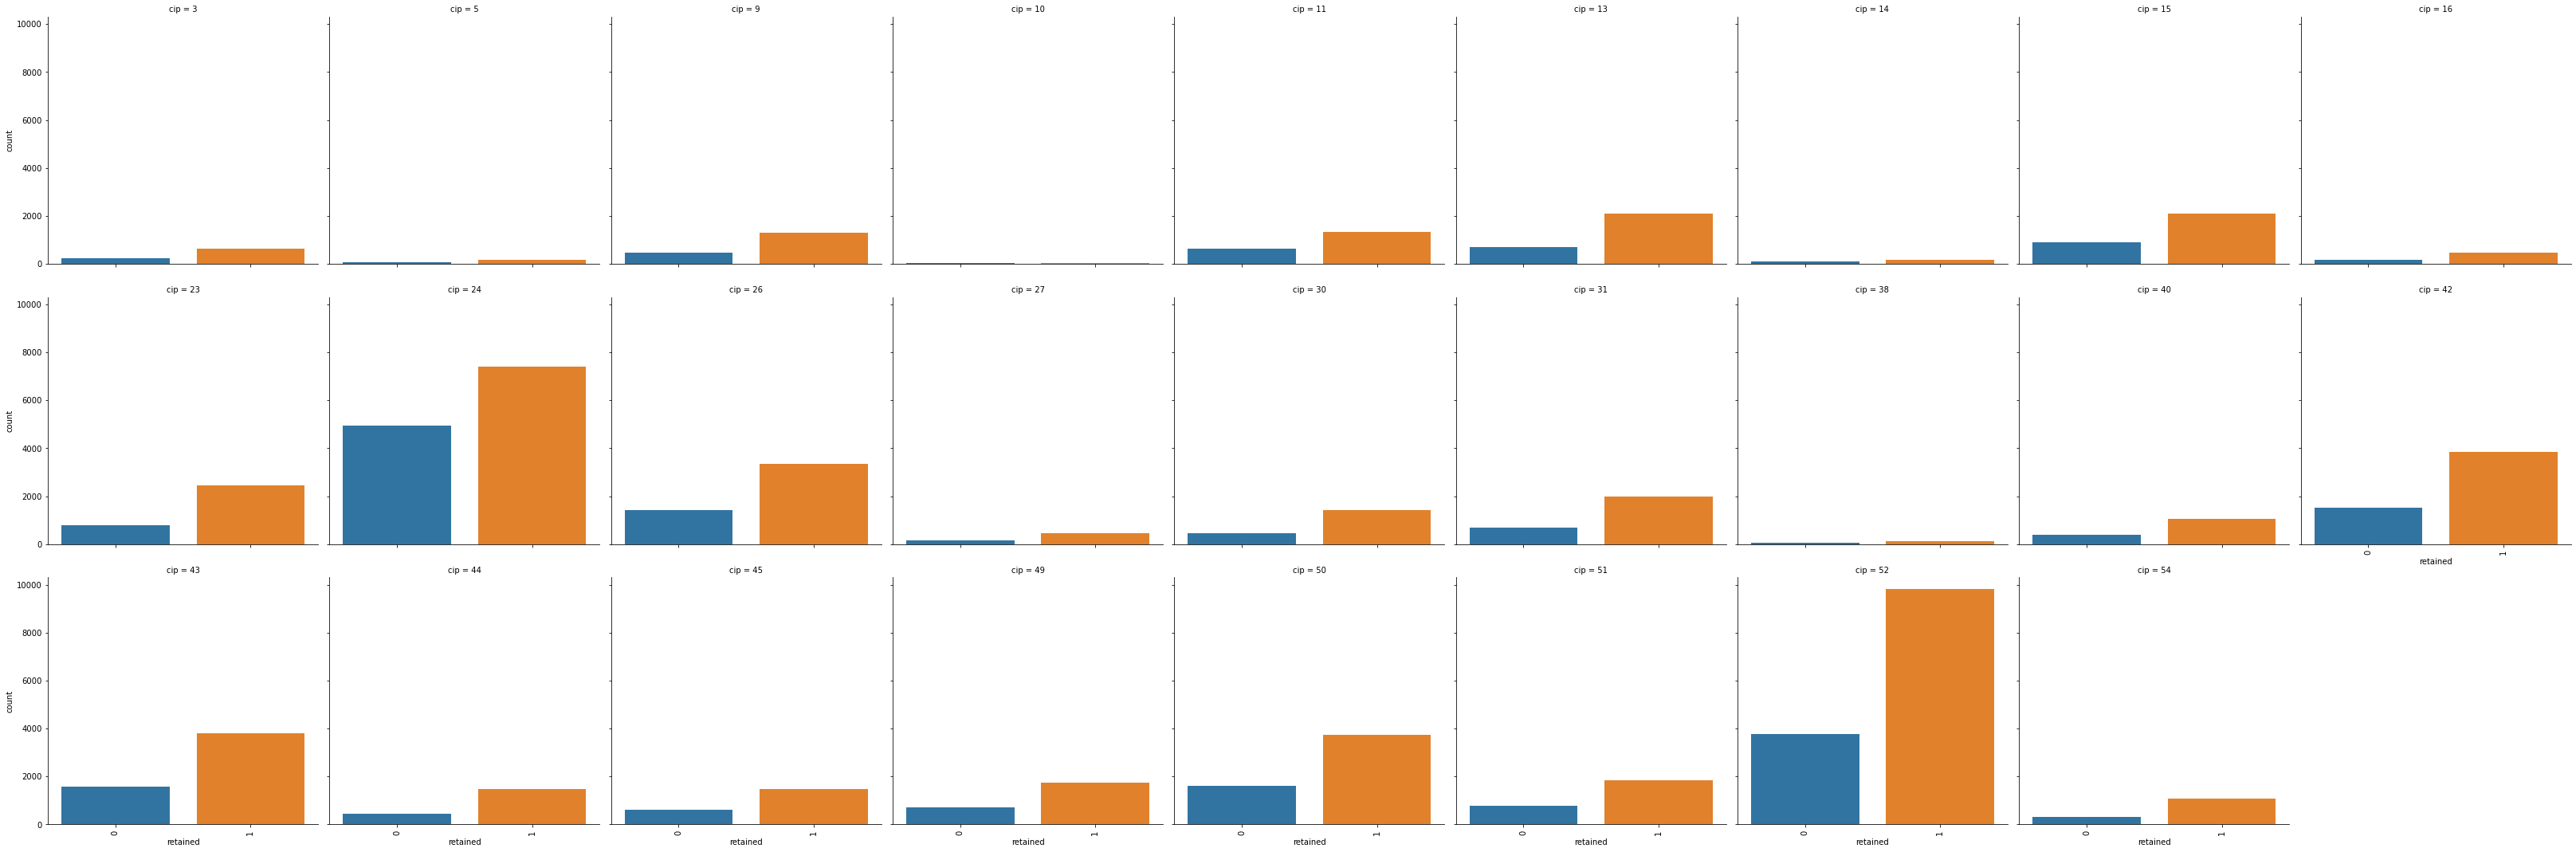

In [52]:
ax = sns.catplot(x='retained',col='cip',col_wrap=9,data=train,kind='count')
ax.set_xticklabels(rotation=90)

#### Chi Sqaured Hypothesis Test

- $H_o$: Area of study is independent of whether or not someone is retained.
- $H_α$: Area of study is not imdependent of whether or not someone is retained.

In [178]:
contingency_table = pd.crosstab(train.title , train.retained)
contingency_table

retained,0,1
title,,
"area,_ethnic,_cultural,_gender,_and_group_studies",71,153
biological_and_biomedical_sciences,1413,3339
"business,_management,_marketing,_and_related_support_services",3774,9818
"communication,_journalism,_and_related_programs",477,1280
communications_technologies/technicians_and_support_services,16,21
computer_and_information_sciences_and_support_services,619,1332
education,705,2091
engineering,82,173
engineering/engineering-related_technologies/technicians,903,2084


In [54]:
chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

Observed

[[  71  153]
 [1413 3339]
 [3774 9818]
 [ 477 1280]
 [  16   21]
 [ 619 1332]
 [ 705 2091]
 [  82  173]
 [ 903 2084]
 [ 790 2438]
 [ 164  470]
 [ 790 1858]
 [ 318 1062]
 [1568 3818]
 [4948 7395]
 [ 155  451]
 [ 445 1427]
 [ 238  635]
 [ 703 1969]
 [  64  110]
 [ 374 1045]
 [1525 3840]
 [ 450 1469]
 [ 626 1491]
 [ 727 1759]
 [1626 3749]]
---
Expected

[[  66.96306818  157.03693182]
 [1420.57366071 3331.42633929]
 [4063.22331575 9528.77668425]
 [ 525.24156605 1231.75843395]
 [  11.06086394   25.93913606]
 [ 583.23636617 1367.76363383]
 [ 835.8425832  1960.1574168 ]
 [  76.23027851  178.76972149]
 [ 892.94055651 2094.05944349]
 [ 964.98564326 2263.01435674]
 [ 189.52939834  444.47060166]
 [ 791.59912744 1856.40087256]
 [ 412.54033076  967.45966924]
 [1610.10305905 3775.89694095]
 [3689.84442218 8653.15557782]
 [ 181.15901481  424.84098519]
 [ 559.61992695 1312.38007305]
 [ 260.97660055  612.02339945]
 [ 798.77374188 1873.22625812]
 [  52.01595475  121.98404525]
 [ 424.19907924  

- We reject the null hypothesis.

#### Question 1 Summary: Out of the areas of study that had retention rates below the mean overall retention rate liberal_arts, visual_and_performing_arts and engineering had the biggest portions of the population. Using a Chi^2 test we that retention has a statistically significant association with area of study.

#### Attempts were made Q1

In [55]:
# def get_below_avg_retention():
#     # Count of instances of study catagory
#     count = list(train.title.value_counts().sort_index().values)
#     # Percent of each area of study to the whole
#     percent = [round(num, 4) for num in list(train.title.value_counts(normalize=True).sort_index().values)]
#     # Percent of retained in each area of study
#     percent_retained = list(train[['retained','title']].groupby('title').mean().round(4).retained.values)
#     # Percent not retained in each area of study
#     percent_not_retained = [round(num , 4) for num in list(1 - train[['retained','title']].groupby('title').mean().sort_index().retained.values)]
#     # Mean retention rate of all instances
#     overall_mean_retention = train.retained.mean()
#     # Variable names for df assignment
#     columns = list(train.title.sort_values().unique())
#     # Create Df
#     study_df = pd.DataFrame([count, percent, percent_retained, percent_not_retained] , index = ['count','percent','percent_retained','percent_not_retained'] ,columns = columns).T.reset_index()
#     # Show areas of study with less retention than the average and sort by not retained
#     df_q1 = study_df[study_df['percent_retained'] < overall_mean_retention].sort_values(by='percent_not_retained',ascending=False)
#     # return df
#     return df_q1

In [56]:
# df_q1 = get_below_avg_retention()

In [57]:
# plt.figure(figsize=(12,8))
# ax = sns.barplot(x='index',y ='percent',data=df_q1)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Percent',fontsize=20)
# plt.xlabel('Major', fontsize=20)
# plt.show()
# plt.show()

In [58]:
# plt.figure(figsize=(12,8))
# ax = sns.barplot(x='index',y ='percent_not_retained',data=df_q1)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.ylabel('Percent Not Retained',fontsize=20)
# plt.xlabel('Major', fontsize=20)
# plt.show()

In [59]:
# Count of full dataset
# len(train)

- 78848

In [60]:
# Individual count of retention
# train.retained.value_counts()

- 1: 55277
- 0: 23571

In [61]:
# Count of all retained values
# train.retained.value_counts().sum()

- 78848

In [62]:
# value counts of titles
# train.title.value_counts().sort_index()

In [63]:
# Sum of value counts of titles
# train.title.value_counts().sum()

- 78848

In [64]:
# Value Counts of not retained titles
# train[train['retained'] == 0]['title'].value_counts().sort_index()

In [65]:
# Sum of value counts of not retained titles
# train[train['retained'] == 0]['title'].value_counts().sort_index().sum()

- 23571

In [66]:
# Value Counts of retained titles
# train[train['retained'] == 1]['title'].value_counts().sort_index()

In [67]:
# Summ of value counts of retained titles
# train[train['retained'] == 1]['title'].value_counts().sort_index().sum()

- 55277

In [68]:
# Value Counts of all titles
# train[['retained','title']]['title'].value_counts().sort_index()

In [69]:
# Sum of value counts of all titles
# train[['retained','title']]['title'].value_counts().sort_index().sum()

- 78848

In [70]:
# ax = sns.scatterplot(x='index',y='percent_not_retained',data=study_df)
# ax.set_xticklabels(study_df['index'], rotation=90)
# plt.show()

In [71]:
# # Assign figure size
# plt.figure(figsize=(12,7))
# # Use Squarify to create a tree map of segment counts
# squarify.plot(sizes=cip_df['count'], 
#               label=cip_df['index'],
#               value=cip_df['percent'],
#               color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan'],
#               text_kwargs={'fontsize': 17})
# # Assign titles
# plt.title('CIP by Count', fontsize=27)
# plt.axis('off')
# plt.show()

In [72]:
# # Assign figure size
# plt.figure(figsize=(12,7))
# # Use Squarify to create a tree map of segment counts
# squarify.plot(sizes=df['count'], 
#               label=df['index'],
#               value=df['percent_not_retained'],
#               color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:olive','tab:cyan'],
#               text_kwargs={'fontsize': 17})
# # Assign titles
# plt.title('CIP by Count', fontsize=27)
# plt.axis('off')
# plt.show()

In [73]:
# # Count of instances of study catagory
# count = list(train.cip.value_counts().sort_index().values)
# # Percent of each area of study to the whole
# percent = [round(num, 4) for num in list(train.cip.value_counts(normalize=True).sort_index().values)]
# # Percent of retained in each area of study
# percent_retained = list(train[['retained','cip']].groupby('cip').mean().round(4).retained.values)
# # Percent not retained in each area of study
# percent_not_retained = [round(num , 4) for num in list(1 - train[['retained','cip']].groupby('cip').mean().sort_index().retained.values)]
# # Mean retention rate of all instances
# overall_mean_retention = train.retained.mean()
# # Variable names for df assignment
# cip_columns = list(train.cip.sort_values().unique())
# # Create Df
# cip_study_df = pd.DataFrame([count, percent, percent_retained, percent_not_retained] , index = ['count','percent','percent_retained','percent_not_retained'] ,columns = cip_columns).T.reset_index()
# # Show areas of study with less retention than the average and sort by not retained
# cip_df = study_df[study_df['percent_retained'] < overall_mean_retention].sort_values(by='percent_not_retained',ascending=False)
# # study_df

In [74]:
# Percent not retained
# train[train['retained'] == 0]['title'].value_counts().sort_index() / train[['retained','title']]['title'].value_counts().sort_index()

In [75]:
# Percent retained
# train[train['retained'] == 1]['title'].value_counts().sort_index() / train[['retained','title']]['title'].value_counts().sort_index()

## Question 2: Does a students age combined with area of study affect retention?

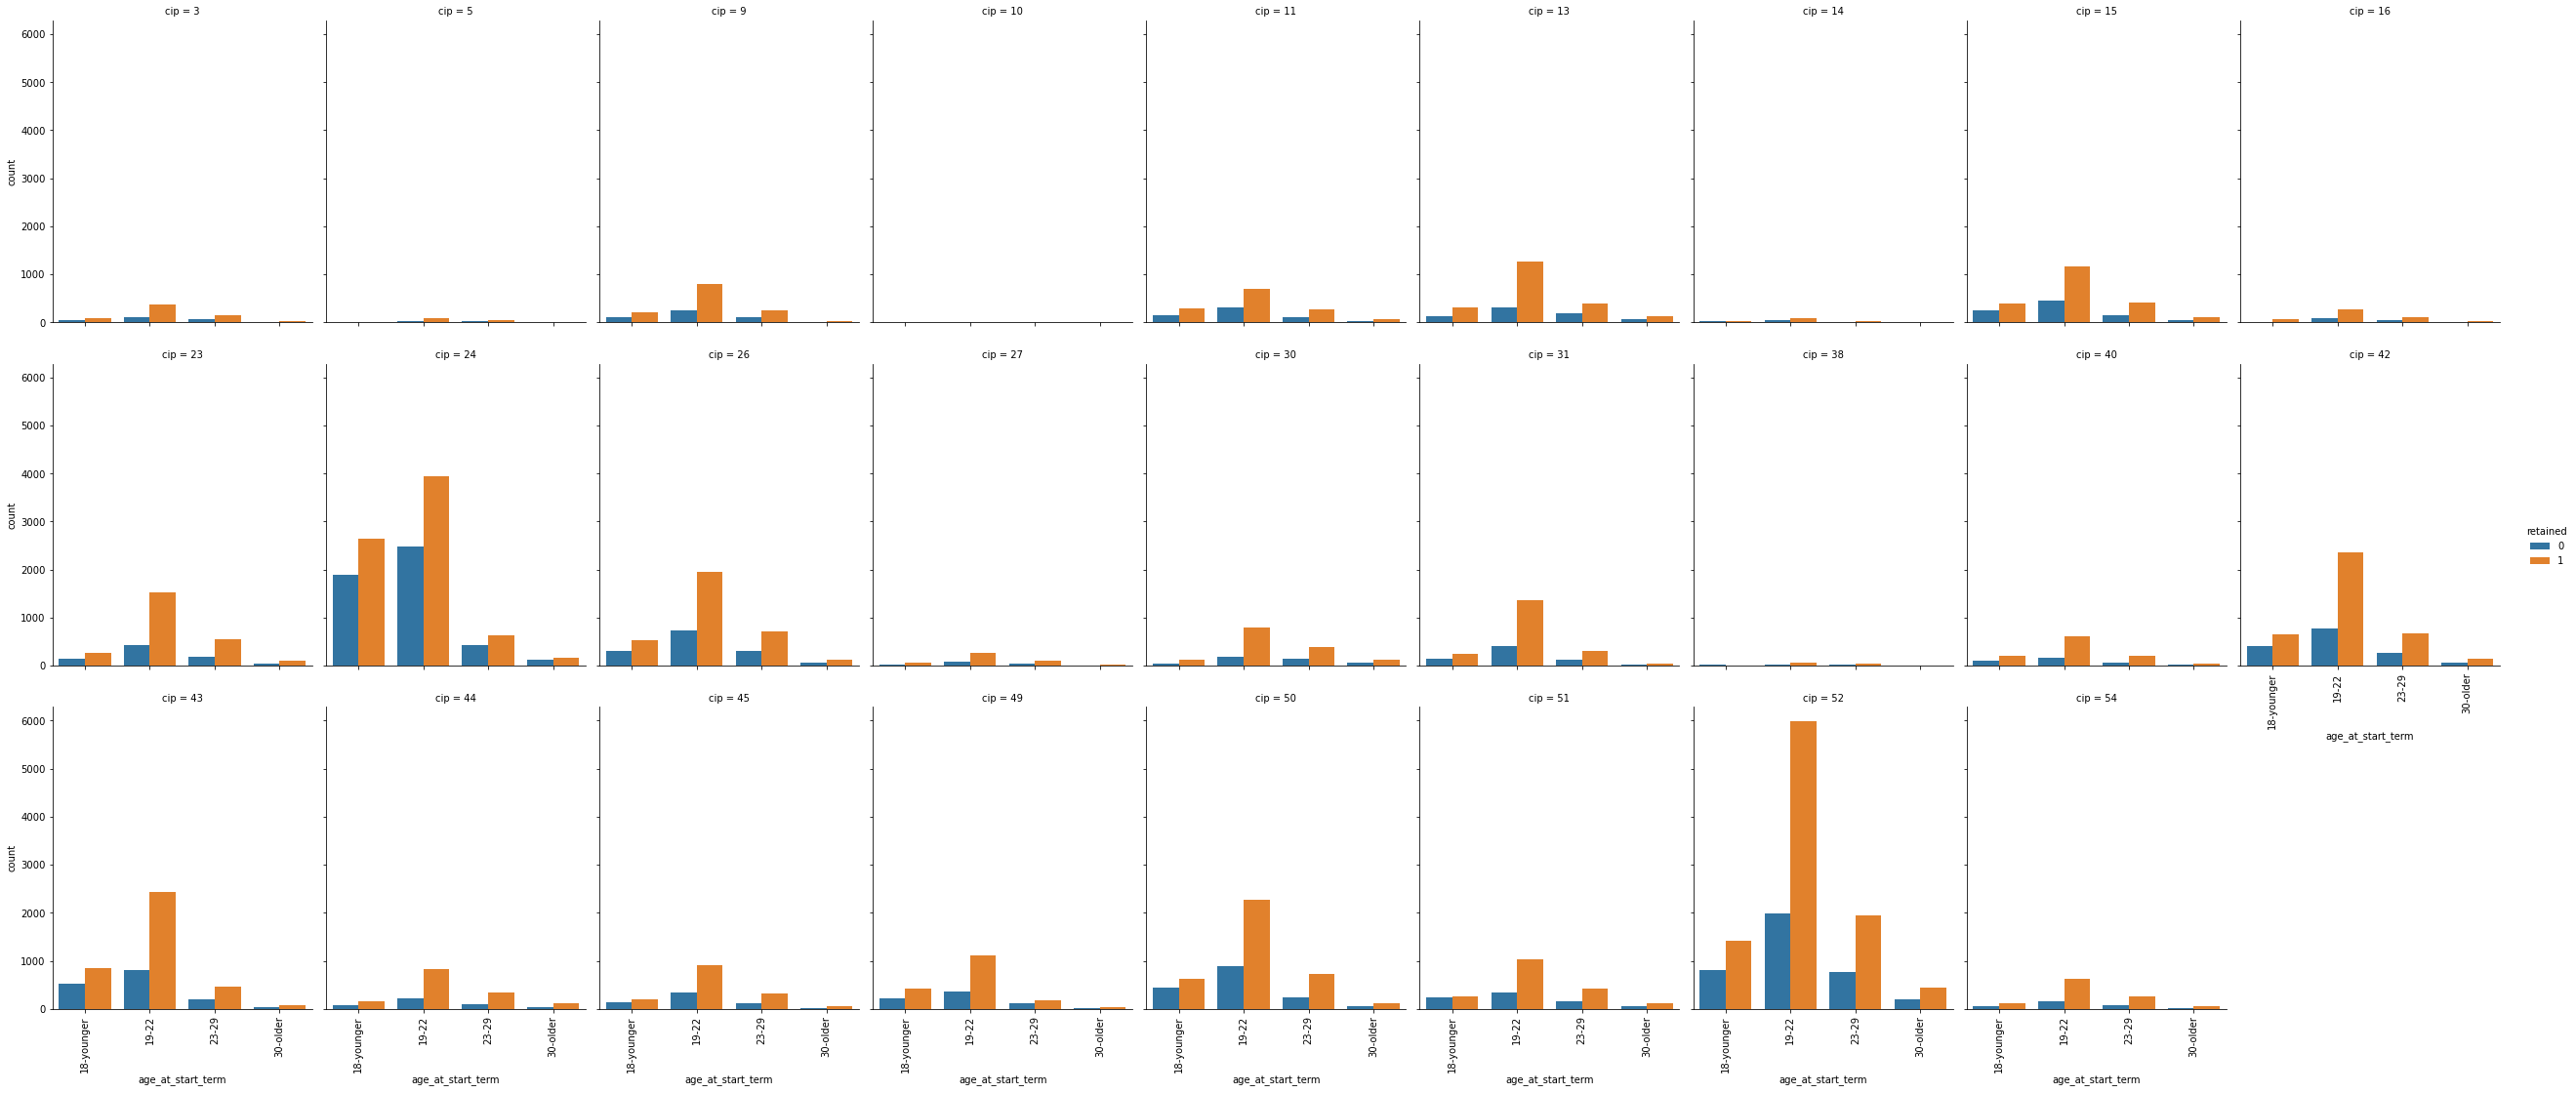

In [76]:
ax = sns.catplot(x='age_at_start_term',col='cip',col_wrap=9,data=train,kind='count',hue='retained',height=5, aspect=.8)
ax.set_xticklabels(rotation=90)
plt.show()

In [77]:
train[['cip','age_at_start_term','retained']].value_counts(normalize=True).sort_index()

cip  age_at_start_term  retained
3    18-younger         0           0.000533
                        1           0.001015
     19-22              0           0.001484
                        1           0.004680
     23-29              0           0.000812
                        1           0.001978
     30-older           0           0.000190
                        1           0.000380
5    18-younger         0           0.000228
                        1           0.000178
     19-22              0           0.000266
                        1           0.001091
     23-29              0           0.000304
                        1           0.000571
     30-older           0           0.000101
                        1           0.000101
9    18-younger         0           0.001395
                        1           0.002651
     19-22              0           0.003145
                        1           0.010095
     23-29              0           0.001332
                      

In [78]:
cip = wrangle.get_cip_codes()
cip.sort_values(by='cip',ascending=False)

,title,cip
31,medical_residency/fellowship_programs,61
19,health_professions_residency/fellowship_programs,60
43,reserved,55
22,history,54
21,high_school/secondary_diplomas_and_certificates,53
5,"business,_management,_marketing,_and_related_support_services",52
18,health_professions_and_related_programs,51
49,visual_and_performing_arts,50
48,transportation_and_materials_moving,49
40,precision_production,48


In [79]:
age_cip_percent = train[['cip','age_at_start_term','retained']].groupby(['cip','age_at_start_term']).mean()
age_cip_percent = age_cip_percent.reset_index()
age_cip_percent = age_cip_percent[age_cip_percent['retained'] != 0]
age_cip_percent.sort_values(by='retained',ascending=False)

,cip,age_at_start_term,retained
102,54,30-older,0.848485
50,27,30-older,0.827586
26,14,30-older,0.809524
52,30,19-22,0.805611
5,5,19-22,0.803738
20,13,19-22,0.802897
100,54,19-22,0.797247
76,44,19-22,0.796756
36,23,19-22,0.783479
31,16,18-younger,0.777778


In [80]:
train[['cip','age_at_start_term','retained']].value_counts()

cip  age_at_start_term  retained
52   19-22              1           5987
24   19-22              1           3951
     18-younger         1           2635
     19-22              0           2490
43   19-22              1           2438
42   19-22              1           2367
50   19-22              1           2267
52   19-22              0           1998
26   19-22              1           1957
52   23-29              1           1953
24   18-younger         0           1892
23   19-22              1           1527
52   18-younger         1           1427
31   19-22              1           1364
13   19-22              1           1275
15   19-22              1           1169
49   19-22              1           1110
51   19-22              1           1038
45   19-22              1            904
50   19-22              0            887
43   18-younger         1            851
44   19-22              1            835
52   18-younger         0            807
43   19-22              

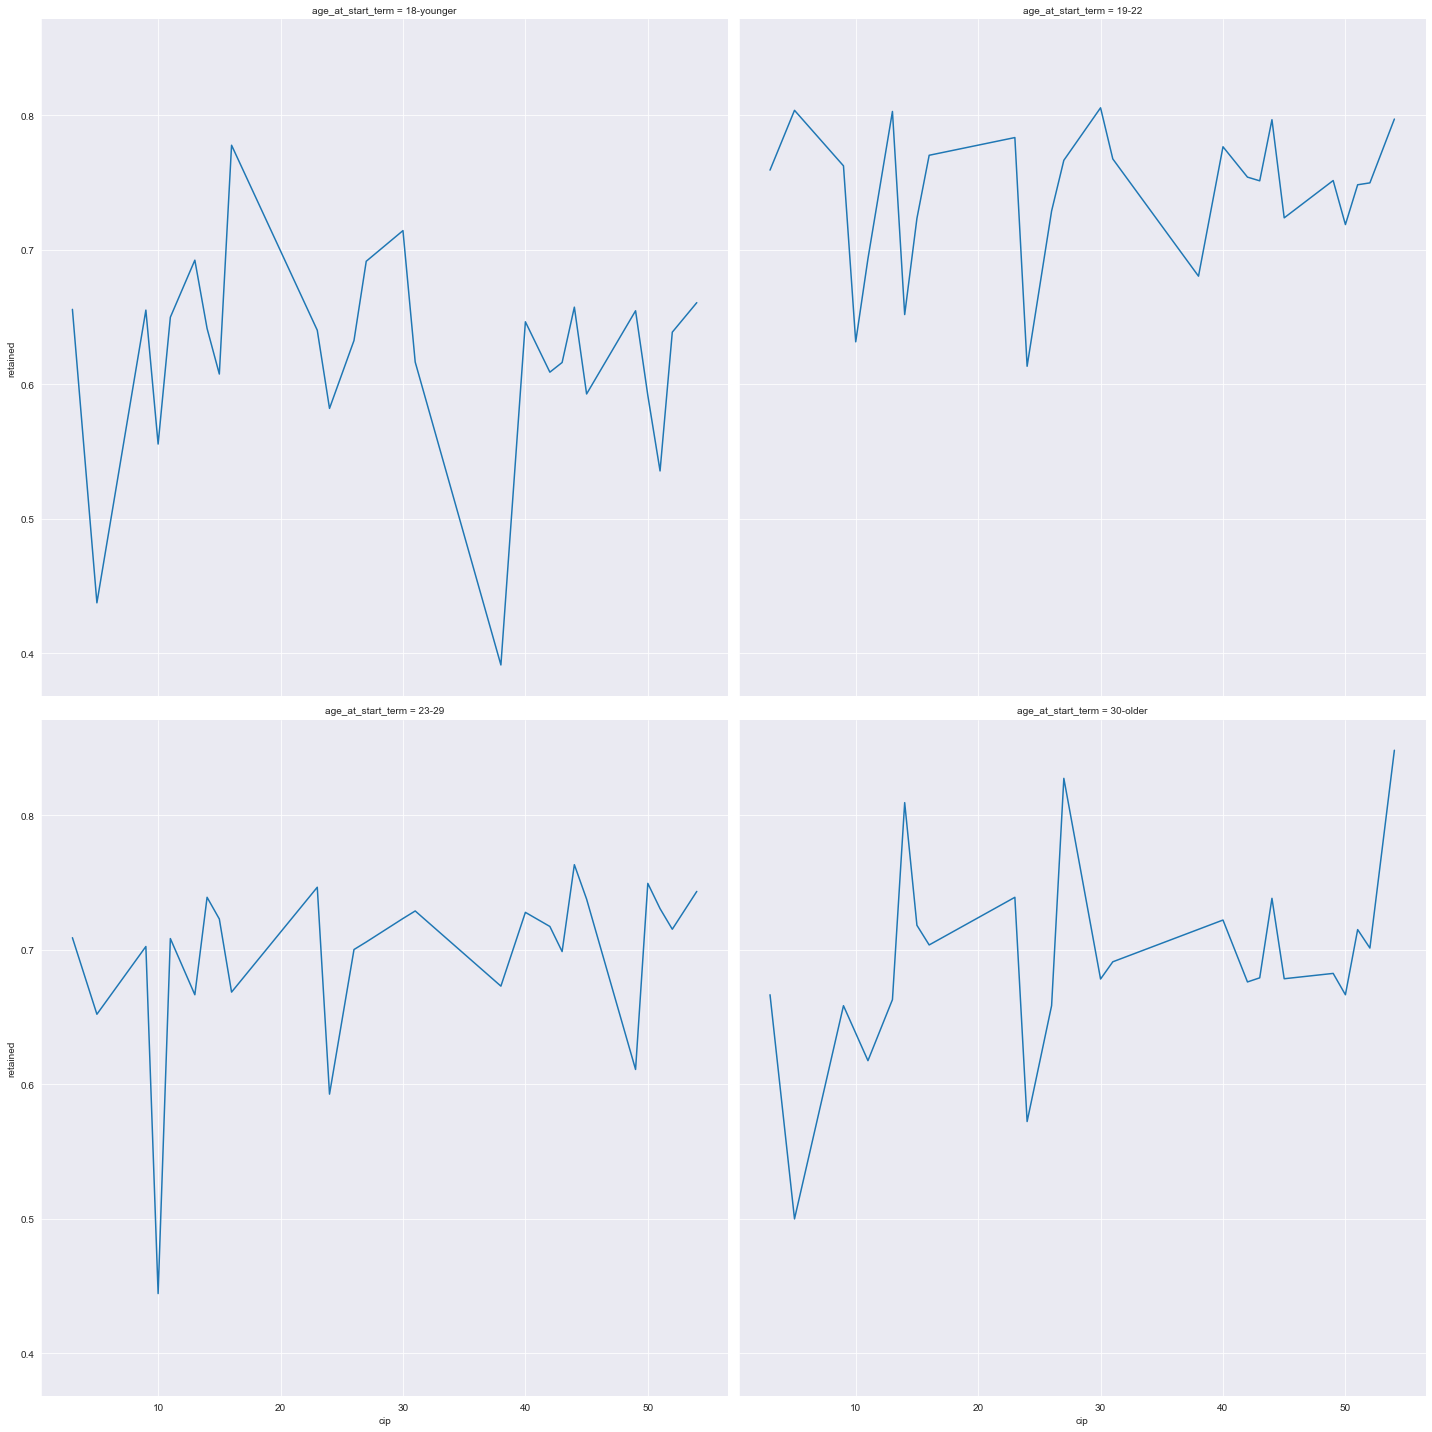

In [81]:
sns.set_style("darkgrid")
sns.relplot( x='cip', y='retained', data=age_cip_percent, col='age_at_start_term', col_wrap=2, kind='line',height=10)
plt.show()

### Question 2 Summary: There doesn't seem to be anthing of note here. Most students are 19-22 and are in cip 52 and 24. Further exploration into this main group should be done to see if there are notable aspects that drive retention in this bigger group.

#### Attempts were made Q2

In [82]:
# from matplotlib.cm import get_cmap
# from matplotlib.patches import Patch

# df = train[['title','age_at_start_term','retained']]

# # This is now what I'd like to plot
# grouped = df.groupby(by=['title','age_at_start_term','retained']).count().unstack()

# # List of retained, to use later as categories in subplots
# kinds = grouped.columns.levels[1]

# # colors for bar graph
# colors = [get_cmap('viridis')(v) for v in np.linspace(0,1,len(kinds))]

# sns.set(context="talk")
# nxplots = len(grouped.index.levels[0])
# nyplots = len(grouped.index.levels[1])
# fig, axes = plt.subplots(nxplots,
#                          nyplots,
#                          sharey=True,
#                          sharex=True,
#                          figsize=(10,12))

# fig.suptitle('Title, Age, and Retention')

# # plot the data
# for a, b in enumerate(grouped.index.levels[0]):
#     for i, j in enumerate(grouped.index.levels[1]):
#         axes[a,i].bar(kinds,grouped.loc[b,j],color=colors)
#         axes[a,i].xaxis.set_ticks([])

# axeslabels = fig.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.grid(False)
# axeslabels.set_ylabel('Title',rotation='horizontal',y=1,weight="bold")
# axeslabels.set_xlabel('Age',weight="bold")

# # x- and y-axis labels
# for i, j in enumerate(grouped.index.levels[1]):
#     axes[nyplots,i].set_xlabel(j)
# for i, j in enumerate(grouped.index.levels[0]):
#     axes[i,0].set_ylabel(j)

# # Tune this manually to make room for the legend
# fig.subplots_adjust(right=0.82)

# fig.legend([Patch(facecolor = i) for i in colors],
#            kinds,
#            title="Retention",
#            loc="center right")


In [83]:
g = sns.FacetGrid(train, col='age_at_start_term',row='cip',height=10)
g.map(sns.histplot, 'retained')

## Question 3: How did the number of years since the student start affect retention?

In [84]:
# Value of year since start instances with retention counts
train[['yrs_since_start','retained']].value_counts().sort_index()

yrs_since_start  retained
0                0            8663
                 1           13301
1                0            6401
                 1           14034
2                0            2723
                 1            9667
3                0            1520
                 1            6551
4                0            1094
                 1            3927
5                0             742
                 1            2288
6 or more        0            2428
                 1            5509
dtype: int64

In [85]:
# Percent of not retained per year instance
yrs_percent = 1 - train[['yrs_since_start','retained']].groupby('yrs_since_start').mean()
yrs_percent

,retained
yrs_since_start,
0,0.394418
1,0.313237
2,0.219774
3,0.188329
4,0.217885
5,0.244884
6 or more,0.305909


<AxesSubplot:xlabel='yrs_since_start', ylabel='retained'>

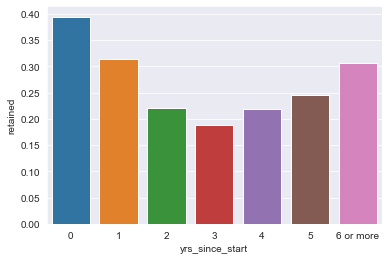

In [86]:
sns.barplot(x=yrs_percent.index,y='retained',data=yrs_percent)

#### Chi Sqaured Hypothesis Test

- $H_o$: yrs_since_start is independent of whether or not someone is retained.
- $H_α$: yrs_since_start is not imdependent of whether or not someone is retained.

In [87]:
contingency_table = pd.crosstab(train.yrs_since_start, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

Observed

[[ 8663 13301]
 [ 6401 14034]
 [ 2723  9667]
 [ 1520  6551]
 [ 1094  3927]
 [  742  2288]
 [ 2428  5509]]
---
Expected

[[ 6565.96798904 15398.03201096]
 [ 6108.88526025 14326.11473975]
 [ 3703.89470881  8686.10529119]
 [ 2412.76305043  5658.23694957]
 [ 1500.98913099  3520.01086901]
 [  905.79507407  2124.20492593]
 [ 2372.70478642  5564.29521358]]
---

chi^2 = 2018.4981
p     = 0.0000
degree of freedom = 6


- We reject null hypothesis

### Question 3 Summary: Running a chi^2 hypothesis test we see that yrs_since_start is not independent from retention. In the graph above we see that retention is highest at yr 0 and it drop till yr 3 which seems to be our lowest retention. Retention then starts to rise the years continue past 3.

## Question 4: Does the students class status (Freshman, Sophmore,etc..) vs the years since a student started affect retention?

In [88]:
train[['student_year','yrs_since_start','retained']].value_counts(normalize=True)

student_year  yrs_since_start  retained
FR            0                1           0.120574
                               0           0.093712
              1                1           0.091454
SO            2                1           0.063578
FR            1                0           0.059152
SO            1                1           0.054523
JU            3                1           0.042563
              2                1           0.035765
SE            6 or more        1           0.032036
SO            0                1           0.029145
JU            4                1           0.023869
              6 or more        1           0.023412
SO            3                1           0.023146
JU            1                1           0.023057
SO            2                0           0.017350
SE            4                1           0.016665
SO            1                0           0.016310
SE            6 or more        0           0.015295
              3         

In [ ]:
class_and_yr = train[['student_year','yrs_since_start','retained']].groupby(['student_year','yrs_since_start']).mean().reset_index()


class_and_yr['student_year'] = class_and_yr.student_year.str.replace('FR','1 - Freshman').str.replace('SO','2 - Sophomore').str.replace('JU','3 - Junior').str.replace('SE','4 - Senior')


class_and_yr = class_and_yr.sort_values(by='student_year')

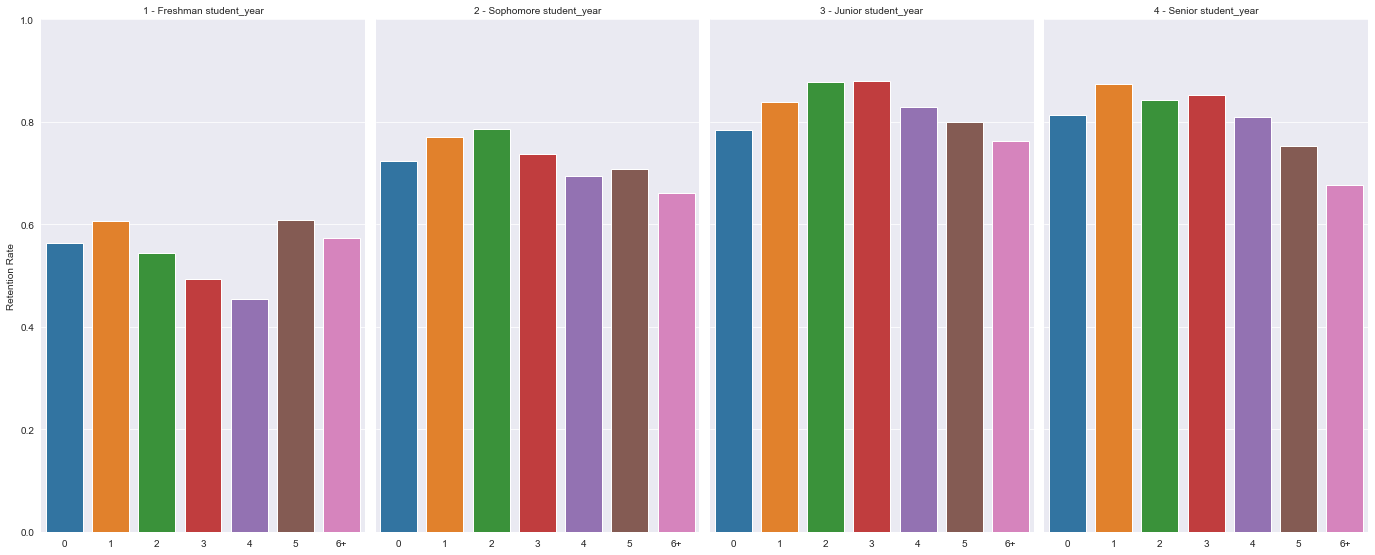

In [90]:
ax = sns.catplot(x="yrs_since_start", y="retained", col="student_year",
                data=class_and_yr, height = 8,
                kind="bar", aspect=.6)

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["0", "1", "2", "3", "4", "5", "6+"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  

### Question 4 Summary: Freshman by far have the lowest retention across the yrs. Juniors and Seniors have the highest. Further exploration could be done with enrollment type to see how first time students compare to transfer students. As well populations can be seperated by full time and part time status. 

## Question 5: Does a students full time or part time status affect retention?

In [91]:
train[['time_status','retained']].value_counts(normalize=True)

time_status  retained
1            1           0.544858
             0           0.191000
0            1           0.156199
             0           0.107942
dtype: float64

<AxesSubplot:xlabel='time_status', ylabel='count'>

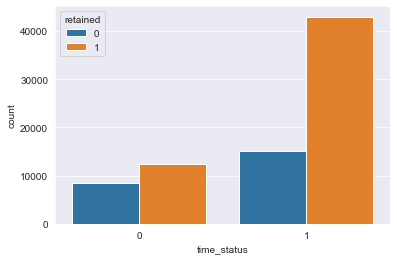

In [92]:
sns.countplot(x = 'time_status',data=train,hue='retained')

#### Chi Sqaured Hypothesis Test

- $H_o$: time_status is independent of whether or not someone is retained.
- $H_α$: time_status is not imdependent of whether or not someone is retained.

In [93]:
contingency_table = pd.crosstab(train.time_status, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

Observed

[[ 8511 12316]
 [15060 42961]]
---
Expected

[[ 6226.07062957 14600.92937043]
 [17344.92937043 40676.07062957]]
---

chi^2 = 1624.7746
p     = 0.0000
degree of freedom = 1


- We reject the null.

### Question 5 Summary: It does look as though full time students are more likely to be retained. The chi^2 test does show that there is a statistically significant relationship between time_status and retention.

## Question 6: Does the students full time / part time status combined with the students dependent status affect retention?

In [94]:
train.depend_status.value_counts(),\
train.depend_status.value_counts(normalize=True),\
train.time_status.value_counts(),\
train.time_status.value_counts(normalize=True),\
train[['time_status','depend_status']].value_counts(),\
train[['time_status','depend_status']].value_counts(normalize=True),\
train[['time_status','depend_status','retained']].value_counts(),\
train[['time_status','depend_status','retained']].value_counts(normalize=True)

(DEP    61667
 IND    17181
 Name: depend_status, dtype: int64,
 DEP    0.7821
 IND    0.2179
 Name: depend_status, dtype: float64,
 1    58021
 0    20827
 Name: time_status, dtype: int64,
 1    0.735859
 0    0.264141
 Name: time_status, dtype: float64,
 time_status  depend_status
 1            DEP              48842
 0            DEP              12825
 1            IND               9179
 0            IND               8002
 dtype: int64,
 time_status  depend_status
 1            DEP              0.619445
 0            DEP              0.162655
 1            IND              0.116414
 0            IND              0.101486
 dtype: float64,
 time_status  depend_status  retained
 1            DEP            1           36186
                             0           12656
 0            DEP            1            7299
 1            IND            1            6775
 0            DEP            0            5526
              IND            1            5017
                            

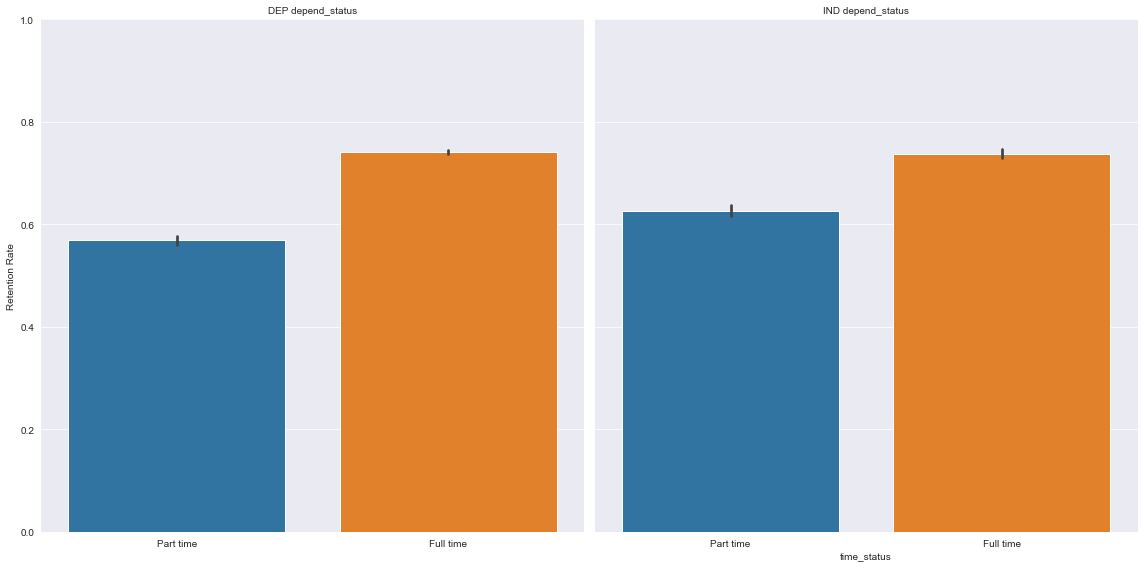

In [95]:
ax = sns.catplot(x="time_status",
                 y="retained", 
                 col="depend_status",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["Part time", "Full time"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('time_status')
plt.show()

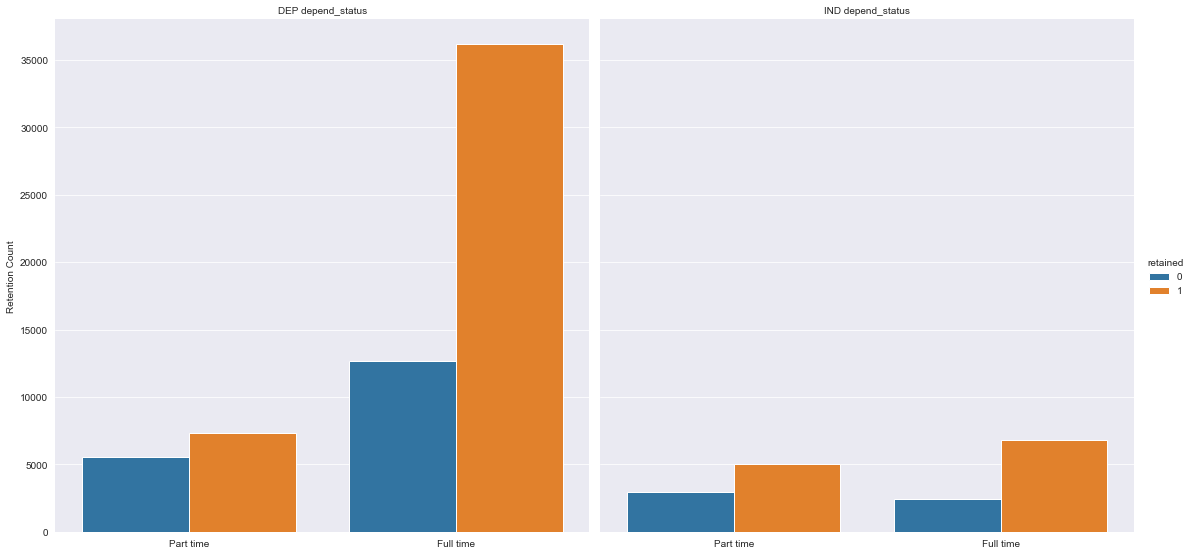

In [96]:
ax = sns.catplot(x='time_status',
                 hue='retained',
                 col='depend_status',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["Part time", "Full time"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 6 Summary: There does not look to be a significant difference in retention for full time students between each dependent status. Independent students had a 5 percent higher retention rate to part time dependent status.

## Question 7: Does the students w_count affect retention?

In [97]:
train.retained.mean(),\
train[train['w_count'] == 1].retained.mean(),\
train[train['w_count'] == 0].retained.mean(),\
train.w_count.value_counts(),\
train.w_count.value_counts(normalize=True),\
train[['w_count','retained']].value_counts(),\
train[['w_count','retained']].value_counts(normalize=True)

(0.7010577313311688,
 0.5513778868682361,
 0.7202547041568291,
 0    69885
 1     8963
 Name: w_count, dtype: int64,
 0    0.886326
 1    0.113674
 Name: w_count, dtype: float64,
 w_count  retained
 0        1           50335
          0           19550
 1        1            4942
          0            4021
 dtype: int64,
 w_count  retained
 0        1           0.638380
          0           0.247945
 1        1           0.062678
          0           0.050997
 dtype: float64)

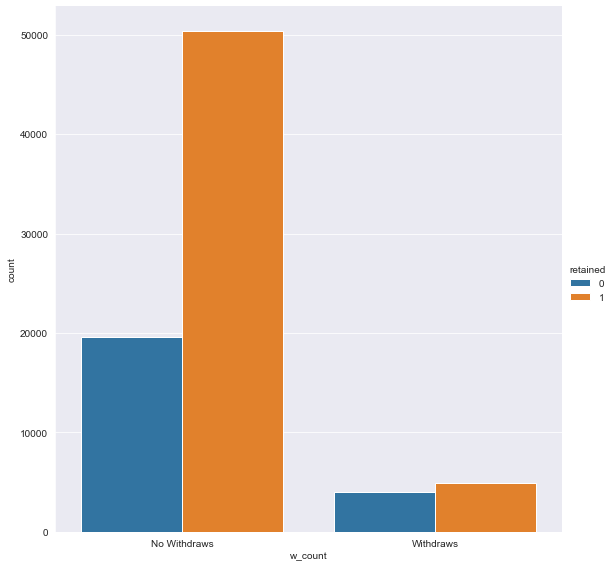

In [98]:
ax = sns.catplot(x='w_count',
              hue='retained',
              data=train,
              kind='count',
              height=8)

(ax.set_xticklabels(["No Withdraws", "Withdraws"]))  

plt.show()

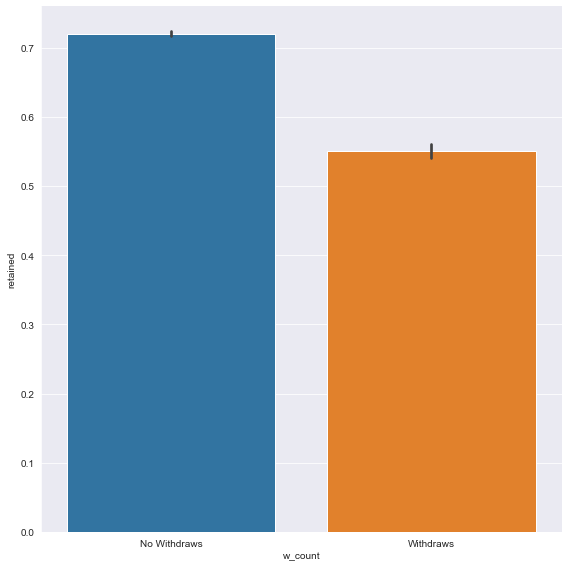

In [99]:
ax = sns.catplot(x="w_count",
                 y="retained", 
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_xticklabels(["No Withdraws", "Withdraws"]))  

plt.show()

#### Chi Sqaured Hypothesis Test

- $H_o$: w_count is independent of whether or not someone is retained.
- $H_α$: w_count is not imdependent of whether or not someone is retained.

In [100]:
contingency_table = pd.crosstab(train.time_status, train.retained)

chi2, p, degf, expected = stats.chi2_contingency(contingency_table)

print('Observed\n')
print(contingency_table.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degree of freedom = {degf}')

Observed

[[ 8511 12316]
 [15060 42961]]
---
Expected

[[ 6226.07062957 14600.92937043]
 [17344.92937043 40676.07062957]]
---

chi^2 = 1624.7746
p     = 0.0000
degree of freedom = 1


- We reject the null hypothesis.

### Question 7 Summary: 70 percent of students did not have a w_count in the base semester of the retention calculation, out of those students the retention rate was higher than the average. The 30 percent of students with at least one withdraw had a much lower retention rate of 55 percent.

## Question 8: Does the students financial aid status and pell_grant status affect retention?

In [101]:
train[['pell_ever']].value_counts(),\
train[['pell_ever']].value_counts(normalize=True),\
train[['fa_recd']].value_counts(),\
train[['fa_recd']].value_counts(normalize=True),\
train[['pell_ever','fa_recd']].value_counts(),\
train[['pell_ever','fa_recd']].value_counts(normalize=True),\
train[['pell_ever','fa_recd','retained']].value_counts(),\
train[['pell_ever','fa_recd','retained']].value_counts(normalize=True)

(pell_ever
 1            47666
 0            31182
 dtype: int64,
 pell_ever
 1            0.60453
 0            0.39547
 dtype: float64,
 fa_recd
 1          63928
 0          14920
 dtype: int64,
 fa_recd
 1          0.810775
 0          0.189225
 dtype: float64,
 pell_ever  fa_recd
 1          1          43122
 0          1          20806
            0          10376
 1          0           4544
 dtype: int64,
 pell_ever  fa_recd
 1          1          0.546900
 0          1          0.263875
            0          0.131595
 1          0          0.057630
 dtype: float64,
 pell_ever  fa_recd  retained
 1          1        1           32044
 0          1        1           14843
 1          1        0           11078
 0          0        1            5969
            1        0            5963
            0        0            4407
 1          0        1            2421
                     0            2123
 dtype: int64,
 pell_ever  fa_recd  retained
 1          1        1         

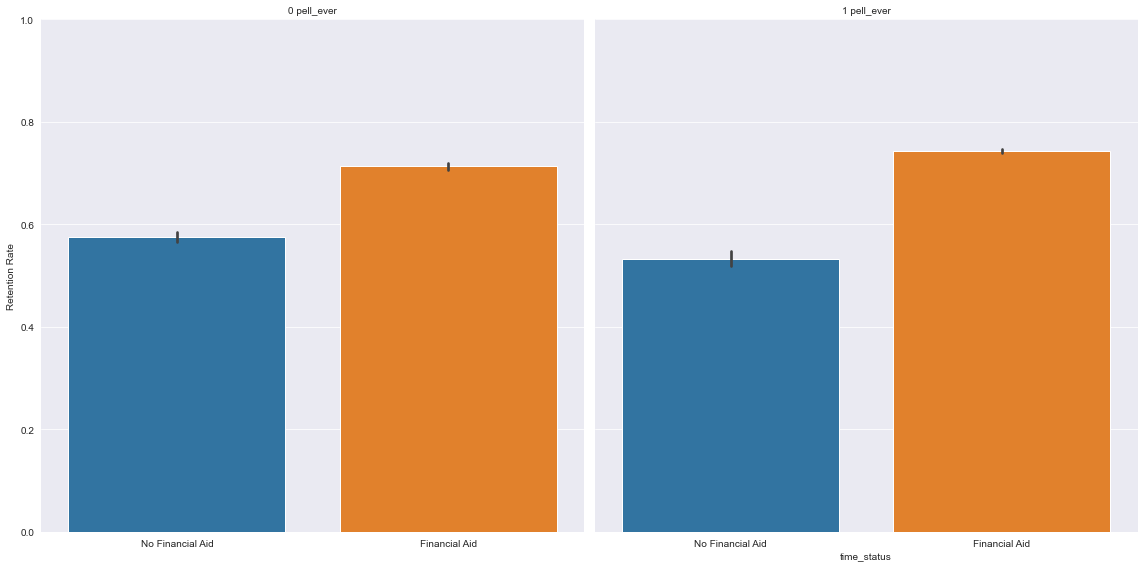

In [102]:
ax = sns.catplot(x="fa_recd",
                 y="retained", 
                 col="pell_ever",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["No Financial Aid", "Financial Aid"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('time_status')
plt.show()

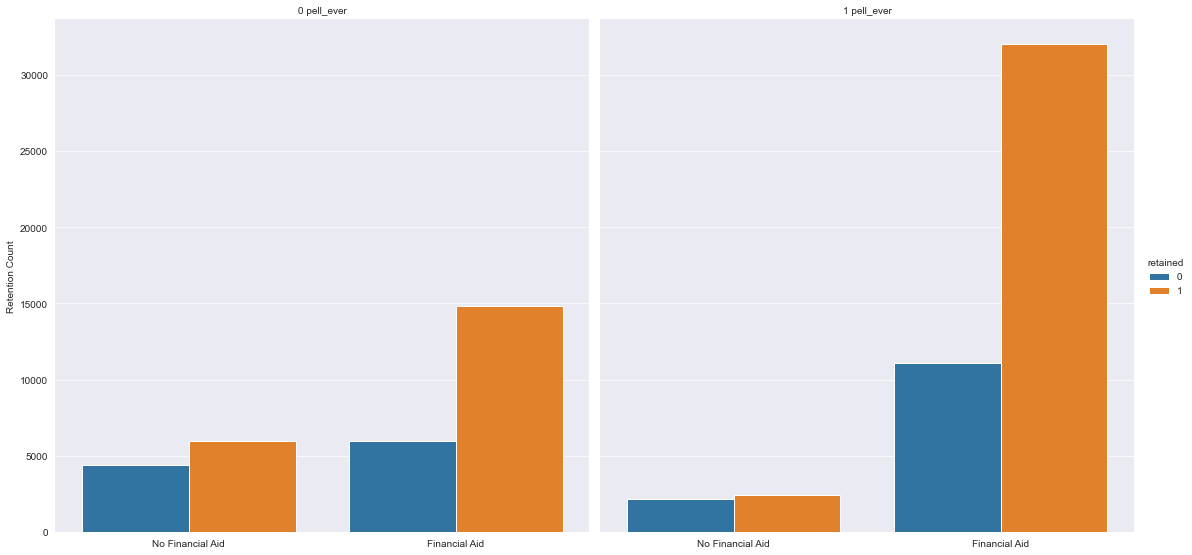

In [103]:
ax = sns.catplot(x='fa_recd',
                 hue='retained',
                 col='pell_ever',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["No Financial Aid", "Financial Aid"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 8 Summary: Students who recieved financial aid were more likely to be retained whether they had ever been pell eligible before or not. Out of those that had not received financial aid the retention rate was almost the same but those that had never been pell eligible had a slightly higher retention rate.

## Question 9: How does a students expected family contribution affect retention?

In [104]:
train[['efc','retained']].groupby('retained').mean()

,efc
retained,
0,10871.074668
1,12106.941856


In [105]:
efc_nonzero = train[train['efc'] != 0][['efc','retained']]
efc_nonzero['efc_bin'] = pd.qcut(train.efc, 4, labels =['lowest','low','high','highest'])
efc_nonzero.groupby('efc_bin').mean()

,efc,retained
efc_bin,,
lowest,5.507123,0.689459
low,2124.440069,0.702483
high,8852.261414,0.717380
highest,35981.016793,0.725280


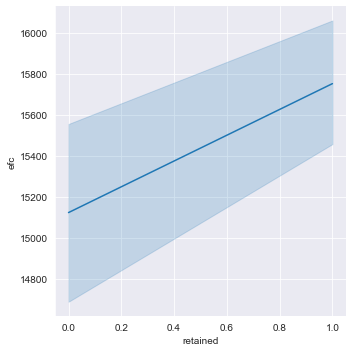

In [106]:
# boxplot efc by retention
sns.relplot(x='retained',y='efc',kind='line',data= efc_nonzero)
plt.show()

In [107]:
efc_zero = train[train['efc'] == 0][['efc','retained']]
efc_zero.retained.mean()

0.6586672159851684

<AxesSubplot:xlabel='retained', ylabel='count'>

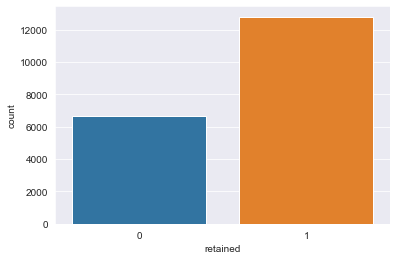

In [108]:
# boxplot efc by retention
sns.countplot(x='retained',data= efc_zero)

### Question 9 Summary: Almost 25 percent of students had no expected family contribution recorded. Out of those that did the bottom 25 % had a average retention rate that was 3.5 percent lower than the top 25 %. Those with no efc values had a 6.6 percent lower efc than the top 25 percent.

##### Attemps were made: Q8

In [109]:
# len(train),\
# len(train[train.efc != 0]),\
# len(train[train.efc != 0]) / len(train),\
# len(train[train.efc == 0]),\
# len(train[train.efc == 0]) / len(train),\
# len(train[train.efc > 100_000]),\
# len(train[train.efc > 100_000]) / len(train),\
# len(train[train.efc > 50_000]),\
# len(train[train.efc > 50_000]) / len(train),\
# len(train[train.efc > 5_000]),\
# len(train[train.efc > 5_000]) / len(train)

In [110]:
# efc[efc['efc_bin'] == 'lowest'].describe(),\
# efc[efc['efc_bin'] == 'low'].describe(),\
# efc[efc['efc_bin'] == 'high'].describe(),\
# efc[efc['efc_bin'] == 'highest'].describe(),\
# len(efc[efc['efc']==999999]),\
# efc['efc'].value_counts().index.max()

## Question 10: Does a students term gpa or hs gpa affect retention?

In [111]:
train[['retained','hs_gpa','term_gpa']].groupby('retained').mean()

,hs_gpa,term_gpa
retained,,
0,2.869537,1.788045
1,3.030040,2.944041


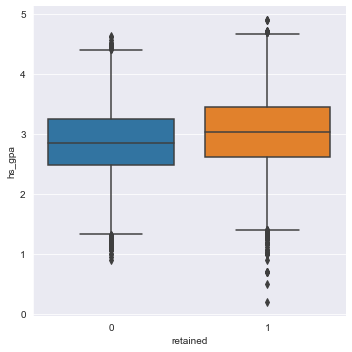

In [112]:
sns.catplot(x='retained',y='hs_gpa',data = train, kind ='box')

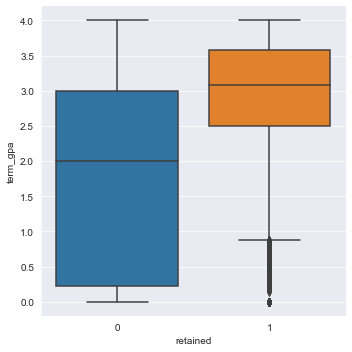

In [113]:
sns.catplot(x='retained',y='term_gpa',data = train, kind ='box')

Independent T-Test(1-tail,2-sample) Hypothesis test

- $H_o$: Those who are not retained have the same term_gpa as those who are retained.
- $H_α$: Those who are not retained have a lower term_gpa than those who are retained

<AxesSubplot:>

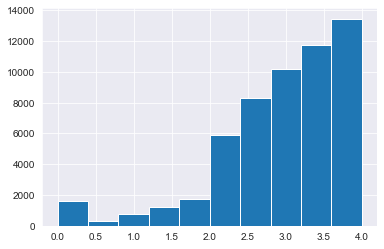

In [114]:
retained = train[train.retained == 1].term_gpa
retained.hist()

In [115]:
retained.mean(),\
len(retained),\
(retained == 0).mean()

(2.9440406049720713, 55277, 0.02697324384463701)

<AxesSubplot:>

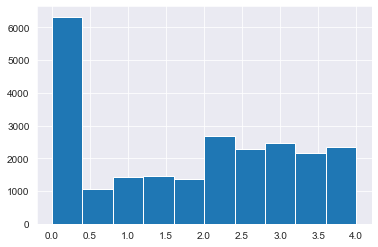

In [116]:
not_retained = train[train.retained == 0].term_gpa
not_retained.hist()

In [117]:
not_retained.mean(),\
len(not_retained),\
(not_retained == 0).mean()

(1.7880445509487382, 23571, 0.2439014042679564)

In [118]:
retained.var(),\
not_retained.var()

(0.7608328723747084, 1.8487977484229117)

In [119]:
α = 0.05

In [120]:
t, p = stats.ttest_ind(not_retained, retained, equal_var=False)
t, p

(-120.39060586680824, 0.0)

In [121]:
if p/2 > α:
    print('We fail to reject the null')
elif t < 0:
    print('We fail to reject the null')
else:
    print('We reject the null')

We fail to reject the null


- According to the T-test we do not reject the null which goes against what I would think. This should be revisted and checked for validity. Sample are not really normal. The retained sample has 2 % zero values while the not retained has almost 25 % zero values. Variance is not equal so it was run as a welch's t-test. 

In [122]:
# len(train[train.term_gpa == 0]) / len(train),\
# train[train.term_gpa == 0].retained.mean(),\
# train[train.term_gpa == 0].term_gpa.mean(),\
# len(train[train.term_gpa < 0.5]) / len(train),\
# train[train.term_gpa < 0.5].retained.mean(),\
# train[train.term_gpa < 0.5].term_gpa.mean(),\
# len(train[(train.retained == 0) & (train.term_gpa != 0)]) / len(train),\
# train[(train.retained == 0) & (train.term_gpa != 0)].retained.mean(),\
# train[(train.retained == 0) & (train.term_gpa != 0)].term_gpa.mean(),\
# train.term_gpa.mean(),\
# train.hs_gpa.mean()

### Question 10 Summary: Term gpa seems to be a better predictor than hs_gpa. Bottom 75 % of students in the not retained category had a term_gpa less than the bottom 50 % of those retained. Also note for later analysis hs_gpa does not change with a student over time but term_gpa does. Hs_gpa variables could be skewed because of repeats for each semester a student takes, while term_gpa changes semester to semester. 

## Question 11: Does enrollment type and yrs_since_start affect retention?

In [123]:
train[['enroll_type','retained']].value_counts(), train[['enroll_type','retained']].value_counts(normalize=True)

(enroll_type  retained
 FIRST        1           43125
              0           18300
 TRANSFER     1           11693
              0            5062
 CONC         1             459
              0             209
 dtype: int64,
 enroll_type  retained
 FIRST        1           0.546938
              0           0.232092
 TRANSFER     1           0.148298
              0           0.064199
 CONC         1           0.005821
              0           0.002651
 dtype: float64)

In [124]:
train.groupby('enroll_type').retained.mean()

enroll_type
CONC        0.687126
FIRST       0.702076
TRANSFER    0.697881
Name: retained, dtype: float64

In [125]:
train.groupby('yrs_since_start').retained.mean()

yrs_since_start
0            0.605582
1            0.686763
2            0.780226
3            0.811671
4            0.782115
5            0.755116
6 or more    0.694091
Name: retained, dtype: float64

In [126]:
train.groupby(['enroll_type','yrs_since_start']).retained.mean().sort_index()

enroll_type  yrs_since_start
CONC         0                  0.512605
             1                  0.698795
             2                  0.760563
             3                  0.738636
             4                  0.829268
             5                  0.680000
             6 or more          0.666667
FIRST        0                  0.592898
             1                  0.674600
             2                  0.781918
             3                  0.823881
             4                  0.797832
             5                  0.765193
             6 or more          0.702586
TRANSFER     0                  0.641449
             1                  0.728784
             2                  0.774526
             3                  0.752923
             4                  0.688859
             5                  0.704883
             6 or more          0.656362
Name: retained, dtype: float64

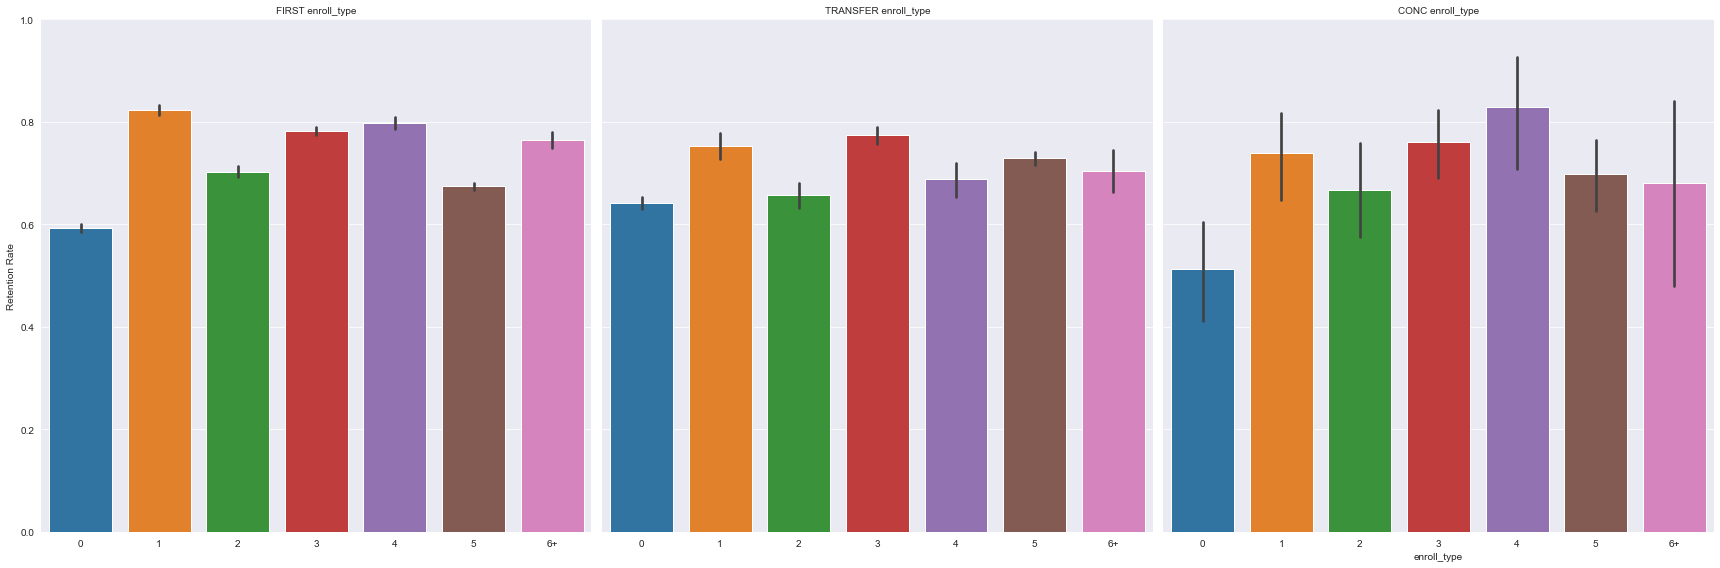

In [127]:
ax = sns.catplot(x="yrs_since_start",
                 y="retained", 
                 col="enroll_type",
                 data=train, 
                 height = 8,
                 kind="bar")

(ax.set_axis_labels("", "Retention Rate")
  .set_xticklabels(["0","1","2","3","4","5","6+"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))  
plt.xlabel('enroll_type')
plt.show()

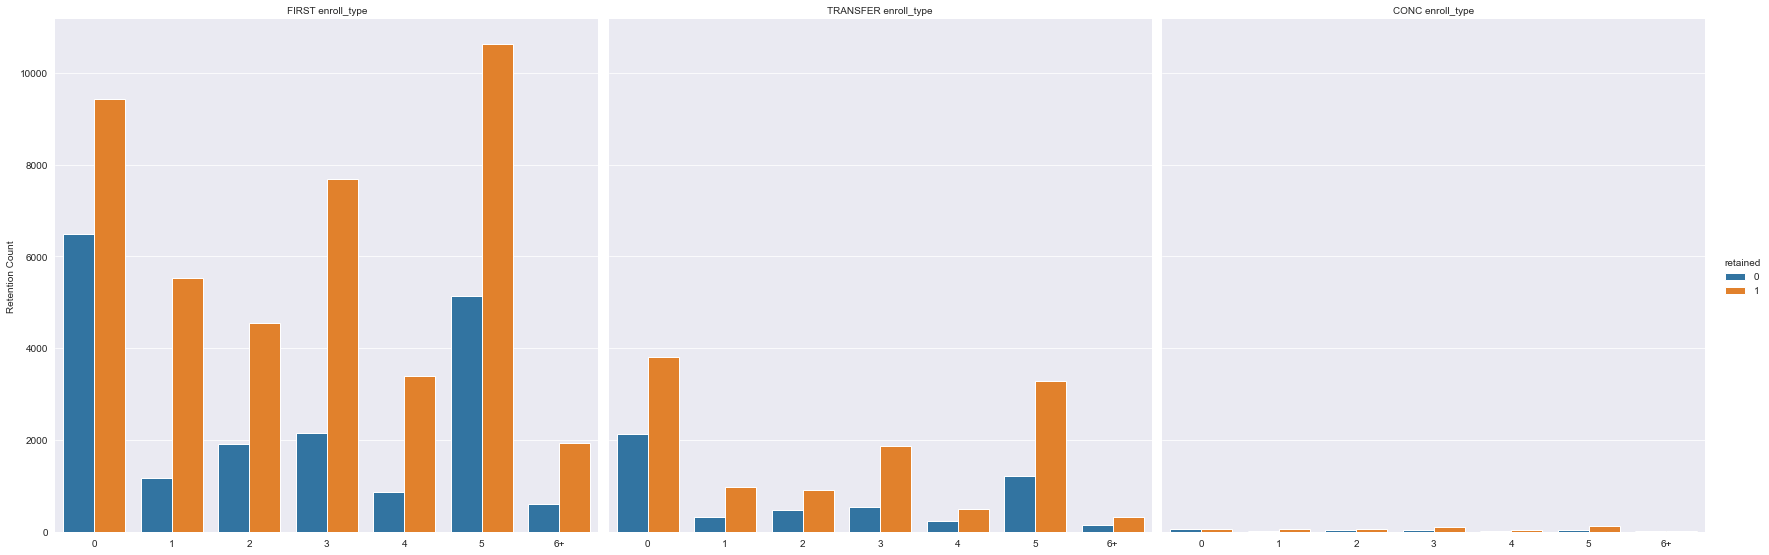

In [128]:
ax = sns.catplot(x='yrs_since_start',
                 hue='retained',
                 col='enroll_type',
                 data=train,
                 kind='count',
                 height = 8)

(ax.set_axis_labels("", "Retention Count")
  .set_xticklabels(["0","1","2","3","4","5","6+"])
  .set_titles("{col_name} {col_var}")
  .despine(left=True))  
plt.show()

### Question 11 Summary: It does look as though overall students in their first year have the lowest retention across the board. Concurant students seem to have a peak in retetention around year 4, Transfer students seem to have a peak around year 2 and first term students seem to have a peak around year 3. First term students make up over 3/4 of the population so. it seems the trend in first term students is closer to what is seen over the overall population.

## Question 12: Does whether a student was enrolled between the retention semester affect retention?

In [159]:
train.enrolled_between.value_counts()

1    59802
0    19046
Name: enrolled_between, dtype: int64

In [158]:
train.groupby('enrolled_between').retained.mean()

enrolled_between
0    0.319280
1    0.822648
Name: retained, dtype: float64

<AxesSubplot:xlabel='enrolled_between', ylabel='count'>

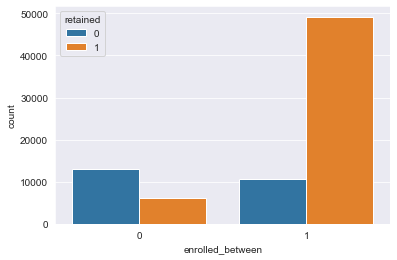

In [160]:
sns.countplot(x='enrolled_between',hue='retained',data=train)

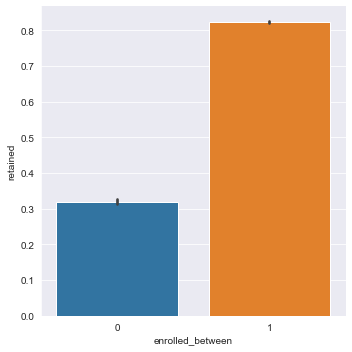

In [162]:
sns.catplot(x='enrolled_between',y='retained',data=train, kind='bar')


#### Question 12 Summary: If a student was not enrolled between the retention semester it seems to be the biggest indicator that they will not be retained.



## Questions Summary:

Question 1: How did area of study affect retention?
- Q1: Out of the areas of study that had retention rates below the mean overall retention rate liberal_arts, visual_and_performing_arts and engineering had the biggest portions of the population. Using a Chi^2 test we that retention has a statistically significant association with area of study.

Question 2: Does a students age combined with area of study affect retention?
- Q2: There doesn't seem to be anthing of note here. Most students are 19-22 and are in cip 52 and 24. Further exploration into this main group should be done to see if there are notable aspects that drive retention in this bigger group.

Question 3: How did the number of years since the student start affect retention?
- Q3: Running a chi^2 hypothesis test we see that yrs_since_start is not independent from retention. In the graph above we see that retention is highest at yr 0 and it drop till yr 3 which seems to be our lowest retention. Retention then starts to rise the years continue past 3.

Question 4: Does the students class status (Freshman, Sophmore,etc..) vs the years since a student started affect retention?
- Q4: Freshman by far have the lowest retention across the yrs. Juniors and Seniors have the highest. Further exploration could be done with enrollment type to see how first time students compare to transfer students. As well populations can be seperated by full time and part time status. 

Question 5: Does a students full time or part time status affect retention?
- Q5: It does look as though full time students are more likely to be retained. The chi^2 test does show that there is a statistically significant relationship between time_status and retention.

Question 6: Does the students full time / part time status combined with the students dependent status affect retention?
- Q6: There does not look to be a significant difference in retention for full time students between each dependent status. Independent students had a 5 percent higher retention rate to part time dependent status.

Question 7: Does the students w_count affect retention?
- Q7: 70 percent of students did not have a w_count in the base semester of the retention calculation, out of those students the retention rate was higher than the average. The 30 percent of students with at least one withdraw had a much lower retention rate of 55 percent.

Question 8: Does the students financial aid status and pell_grant status affect retention?
- Q8: Students who recieved financial aid were more likely to be retained whether they had ever been pell eligible before or not. Out of those that had not received financial aid the retention rate was almost the same but those that had never been pell eligible had a slightly higher retention rate.

Question 9: How does a students expected family contribution affect retention?
- Q9: Almost 25 percent of students had no expected family contribution recorded. Out of those that did the bottom 25 % had a average retention rate that was 3.5 percent lower than the top 25 %. Those with no efc values had a 6.6 percent lower efc than the top 25 percent.

Question 10: Does a students term gpa or hs gpa affect retention?
- Q10: Term gpa seems to be a better predictor than hs_gpa. Bottom 75 % of students in the not retained category had a term_gpa less than the bottom 50 % of those retained. Also note for later analysis hs_gpa does not change with a student over time but term_gpa does. Hs_gpa variables could be skewed because of repeats for each semester a student takes, while term_gpa changes semester to semester. 

Question 11: Does enrollment type affect retention?
- Q11: It does look as though overall students in their first year have the lowest retention across the board. Concurant students seem to have a peak in retetention around year 4, Transfer students seem to have a peak around year 2 and first term students seem to have a peak around year 3. First term students make up over 3/4 of the population so. it seems the trend in first term students is closer to what is seen over the overall population.

Question 12: Does whether a student was enrolled between the retention semester affect retention?
- Q12: If a student was not enrolled between the retention semester it seems to be the biggest indicator that they will not be retained.

## Initial EDA Summary:

# Feature Exploration (Round 2)

## Clustering (Round 2)

### K-modes

In [129]:
# from kmodes.kmodes import KModes

# # reproduce results on small soybean data set
# x = np.genfromtxt('soybean.csv', dtype=int, delimiter=',')[:, :-1]
# y = np.genfromtxt('soybean.csv', dtype=str, delimiter=',', usecols=(35, ))

# kmodes_huang = KModes(n_clusters=4, init='Huang', verbose=1)
# kmodes_huang.fit(x)

# # Print cluster centroids of the trained model.
# print('k-modes (Huang) centroids:')
# print(kmodes_huang.cluster_centroids_)
# # Print training statistics
# print(f'Final training cost: {kmodes_huang.cost_}')
# print(f'Training iterations: {kmodes_huang.n_iter_}')

# kmodes_cao = KModes(n_clusters=4, init='Cao', verbose=1)
# kmodes_cao.fit(x)

# # Print cluster centroids of the trained model.
# print('k-modes (Cao) centroids:')
# print(kmodes_cao.cluster_centroids_)
# # Print training statistics
# print(f'Final training cost: {kmodes_cao.cost_}')
# print(f'Training iterations: {kmodes_cao.n_iter_}')

# print('Results tables:')
# for result in (kmodes_huang, kmodes_cao):
#     classtable = np.zeros((4, 4), dtype=int)
#     for ii, _ in enumerate(y):
#         classtable[int(y[ii][-1]) - 1, result.labels_[ii]] += 1

#     print("\n")
#     print("    | Cl. 1 | Cl. 2 | Cl. 3 | Cl. 4 |")
#     print("----|-------|-------|-------|-------|")
#     for ii in range(4):
#         prargs = tuple([ii + 1] + list(classtable[ii, :]))
#         print(" D{0} |    {1:>2} |    {2:>2} |    {3:>2} |    {4:>2} |".format(*prargs))


#### K-Modes Summary:

### K-prototypes

In [130]:
# from kmodes.kprototypes import KPrototypes

# # stocks with their market caps, sectors and countries
# syms = np.genfromtxt('stocks.csv', dtype=str, delimiter=',')[:, 0]
# X = np.genfromtxt('stocks.csv', dtype=object, delimiter=',')[:, 1:]
# X[:, 0] = X[:, 0].astype(float)

# kproto = KPrototypes(n_clusters=4, init='Cao', verbose=2)
# clusters = kproto.fit_predict(X, categorical=[1, 2])

# # Print cluster centroids of the trained model.
# print(kproto.cluster_centroids_)
# # Print training statistics
# print(kproto.cost_)
# print(kproto.n_iter_)

# for s, c in zip(syms, clusters):
#     print(f"Symbol: {s}, cluster:{c}")

#### K-prototypes Summary: 

### DBSCAN

#### DBSCAN Summary:

### Hierarchical Clustering

#### Hierarchical Clustering Summary:

### SVM or tree reduction

#### SVM or tree reduction Summary:

### Clustering Summary:

## Dimensionality Reduction (Round 2)

In [131]:
train[train.columns[train.dtypes != 'object']].head()

,id,retained,enrolled_between,sex,time_status,pell_ever,efc,hs_gpa,term_gpa,academic_standing,fa_recd,w_count,reg_before_start,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
46406,1303564,1,1,1,1,0,25207.0,3.29,2.734000,1,1,0,64,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
50551,529121,1,1,1,1,1,0.0,4.02,3.693077,1,1,0,156,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
60771,999526,1,1,0,1,0,18020.0,2.67,3.023846,1,1,0,90,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
139557,384990,1,0,1,1,1,4302.0,3.05,3.257692,1,1,0,93,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
72085,1358512,1,1,0,0,0,191769.0,4.00,2.670000,1,0,0,19,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0


### SelectKBest (Round 2)

In [132]:
# # Import selectkbest from sklearn
# from sklearn.feature_selection import SelectKBest, chi2

# df = train[train.columns[train.dtypes != 'object']].head()

# X_df = df.drop(columns ='retained')
# y_df = df.retained

# # select K best features
# X_best = SelectKBest(chi2, k='all').fit(X_df,y_df)

# X_df_X_best = X_best.transform(X_df)
 
# feature_mask = X_best.get_support()

# f_feature = X_df.iloc[:,feature_mask].columns.tolist()

# f_feature

In [133]:
# X_df.columns

In [134]:
# train[['depend_status','yrs_since_start']].value_counts(normalize=True)
# train.shape

In [135]:
# train.groupby(['depend_status','yrs_since_start']).retained.mean()

In [136]:
# train.act.value_counts(normalize=True)

In [137]:
# train.groupby(['depend_status','yrs_since_start','act']).retained.mean().sort_values()

#### SelectKBest Summary: Need to fix later. SelectKBest is just returning the last columns in the column list with no data. Running low on time come back round 2.

### Recursive Feature Elimination

In [138]:
# # Import RFE from Sklearn
# from sklearn.feature_selection import RFE

# # initialize Linear Regression model
# lm = LinearRegression()

# # Create Recursive Feature Elimination model
# rfe = RFE(lm, n_features_to_select=3)

# # fit the model
# rfe.fit(X_train_scaled, y_train)

# # get mask of columns selected
# feature_mask = rfe.support_

# # get list of selected column names
# rfe_feature = X_train_scaled.iloc[:,feature_mask].columns.tolist()

# # Create list of variables and their ranking

# # ranks
# var_ranks = rfe.ranking_

# # names
# var_names = X_train_scaled.columns.tolist()

# # combine to dataframe
# rfe_ranks_df = pd.DataFrame({'Variable' : var_names, 'Rank' : var_ranks})

# # sort
# rfe_ranks_df.sort_values('Rank')

### Dimensionality Reduction and Feature Exploration Summary:

# Modeling

## Baseline:

In [139]:
train.retained.value_counts()

1    55277
0    23571
Name: retained, dtype: int64

### Baseline Summary: Our baseline value will be retained as it is the mode of retention predictions.

In [140]:
# Setting a baseline of Retained or 1

# We use the DummyClassifier from sklearn to create a baseline accuracy.
from sklearn.dummy import DummyClassifier 

# Here we create and fit the model
dummy = DummyClassifier(strategy='most_frequent', random_state = 1729, constant = None)
dummy.fit(X_train, y_train)   

# Here we create our predictions
y_pred = dummy.predict(X_train)

# Check report for current baseline accuracy: 0.73
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     23571
           1       0.70      1.00      0.82     55277

    accuracy                           0.70     78848
   macro avg       0.35      0.50      0.41     78848
weighted avg       0.49      0.70      0.58     78848



## Evaluation Metrics

The metric I will use for evaluation is 


## Train and Validate Initial Models:

### Decision Tree

In [141]:
train[train.columns[train.dtypes != 'object']].head()

,id,retained,enrolled_between,sex,time_status,pell_ever,efc,hs_gpa,term_gpa,academic_standing,fa_recd,w_count,reg_before_start,race_ethn_African American,race_ethn_American Indian/Alaskan Native,race_ethn_Asian,race_ethn_Hispanic,race_ethn_International,race_ethn_Missing/Unknown,race_ethn_Native Hawaiian/Pacific Islander,race_ethn_Two or More Races,race_ethn_Two or more races,race_ethn_White,fgen_1GN,fgen_1GY,student_year_FR,student_year_JU,student_year_SE,student_year_SO,enroll_type_CONC,enroll_type_FIRST,enroll_type_TRANSFER,"title_area,_ethnic,_cultural,_gender,_and_group_studies",title_biological_and_biomedical_sciences,"title_business,_management,_marketing,_and_related_support_services","title_communication,_journalism,_and_related_programs",title_communications_technologies/technicians_and_support_services,title_computer_and_information_sciences_and_support_services,title_education,title_engineering,title_engineering/engineering-related_technologies/technicians,title_english_language_and_literature/letters,"title_foreign_languages,_literatures,_and_linguistics",title_health_professions_and_related_programs,title_history,"title_homeland_security,_law_enforcement,_firefighting_and_related_protective_services","title_liberal_arts_and_sciences,_general_studies_and_humanities",title_mathematics_and_statistics,title_multi/interdisciplinary_studies,title_natural_resources_and_conservation,"title_parks,_recreation,_leisure,_fitness,_and_kinesiology",title_philosophy_and_religious_studies,title_physical_sciences,title_psychology,title_public_administration_and_social_service_professions,title_social_sciences,title_transportation_and_materials_moving,title_visual_and_performing_arts,age_at_start_term_18-younger,age_at_start_term_19-22,age_at_start_term_23-29,age_at_start_term_30-older,act_20 or more,act_NADA,act_Under 20,depend_status_DEP,depend_status_IND,yrs_since_start_0,yrs_since_start_1,yrs_since_start_2,yrs_since_start_3,yrs_since_start_4,yrs_since_start_5,yrs_since_start_6 or more
46406,1303564,1,1,1,1,0,25207.0,3.29,2.734000,1,1,0,64,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0
50551,529121,1,1,1,1,1,0.0,4.02,3.693077,1,1,0,156,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
60771,999526,1,1,0,1,0,18020.0,2.67,3.023846,1,1,0,90,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0
139557,384990,1,0,1,1,1,4302.0,3.05,3.257692,1,1,0,93,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1
72085,1358512,1,1,0,0,0,191769.0,4.00,2.670000,1,0,0,19,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0


In [153]:
# Import the sklearn Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Split the data
x_train_dt, y_train_dt = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')

# Create the model
dtc = DecisionTreeClassifier(max_depth=4, random_state=1729)

# Fit the model to training set
dtc = dtc.fit(x_train_dt, y_train_dt)

# Predict on trianing set
y_pred_dt = dtc.predict(x_train_dt)

# Print the report
print(classification_report(y_train_dt, y_pred_dt))

              precision    recall  f1-score   support

           0       0.81      0.57      0.67     23571
           1       0.84      0.94      0.89     55277

    accuracy                           0.83     78848
   macro avg       0.82      0.76      0.78     78848
weighted avg       0.83      0.83      0.82     78848



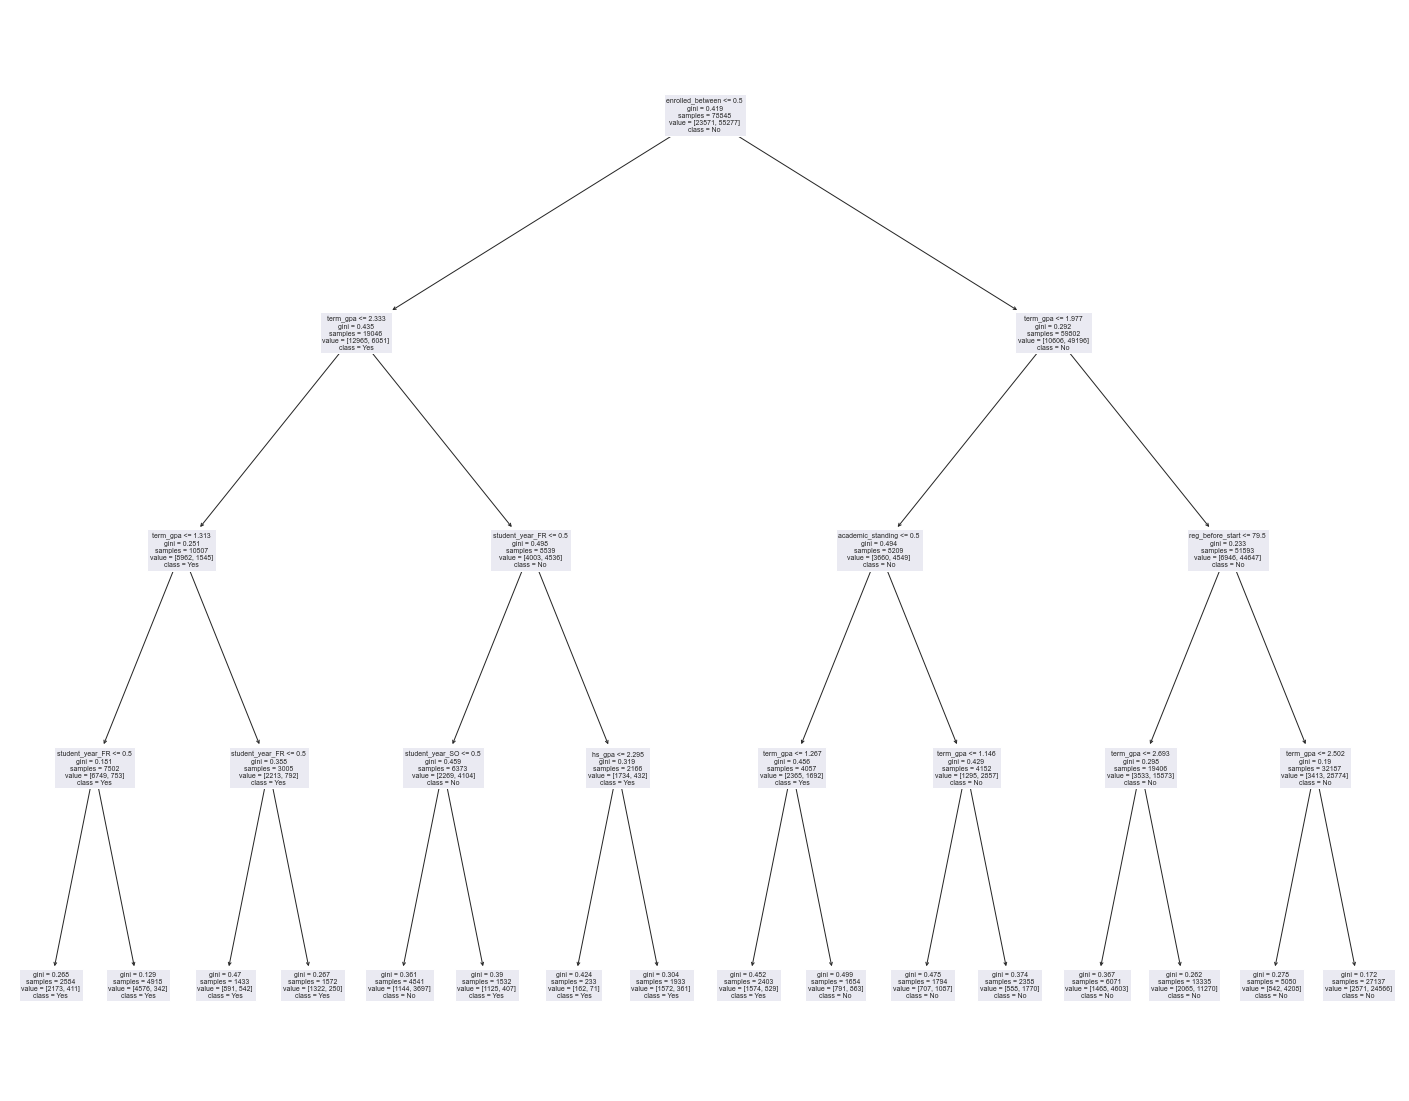

In [154]:
plt.figure(figsize=(25,20))
plot_tree(dtc, feature_names = x_train_dt.columns, class_names=['Yes','No'])
plt.show()

In [155]:
x_validate_dt, y_validate_dt = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
y_pred_val_dt = dtc.predict(x_validate_dt)

print(classification_report(y_validate_dt, y_pred_val_dt))

              precision    recall  f1-score   support

           0       0.80      0.56      0.66     10102
           1       0.84      0.94      0.88     23690

    accuracy                           0.83     33792
   macro avg       0.82      0.75      0.77     33792
weighted avg       0.83      0.83      0.82     33792



#### Decision Tree Summary: 

### Random Forest

In [ ]:
x_train_rf, y_train_rf = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')
rf = RandomForestClassifier(min_samples_leaf=3,
                            max_depth=3, 
                            random_state=1729)
rf.fit(x_train_rf, y_train_rf)
y_pred_rf = rf.predict(x_train_rf)

print(classification_report(y_train_rf, y_pred_rf))

In [ ]:
x_validate_rf, y_validate_rf = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
y_pred_val_rf = rf.predict(x_validate_rf)

print(classification_report(y_validate_rf, y_pred_val_rf))

#### Random Forst Summary:

### KNN

In [ ]:
# Import the sklearn knn classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# split the data
x_train, y_train, = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')
x_validate, y_validate, = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
x_test, y_test, = wrangle.model_split(test[test.columns[test.dtypes != 'object']], 'retained')

stan_scal = StandardScaler()
x_train = stan_scal.fit_transform(x_train)
x_validate = stan_scal.transform(x_validate)
x_test = stan_scal.transform(x_test)

error_rate = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test.T))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
req_k_value = error_rate.index(min(error_rate))+1
print("Minimum error:-",min(error_rate),"at K =",req_k_value)


In [ ]:
pred_i.dtype

In [ ]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=, metric='jaccard')

# Fit the model to training set
knn.fit(x_train_knn, y_train_knn)

# Predict on training set
y_pred_knn = knn.predict(x_train_knn)

# Print the report
print(classification_report(y_train_knn, y_pred_knn))

In [ ]:
x_validate_knn, y_validate_knn = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
y_pred_val_knn = knn.predict(x_validate_knn)

print(classification_report(y_validate_knn, y_pred_val_knn))

#### KNN Summary:

### Logistic Regression

In [ ]:
# Import sklearn logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Split the data
x_train_lr, y_train_lr = wrangle.model_split(train[train.columns[train.dtypes != 'object']], 'retained')

# Create the model
logit = LogisticRegression(C=10, random_state=1729)

# Fit the model to training set
logit.fit(x_train_lr, y_train_lr)

# Predict on training set
y_pred_lr = logit.predict(x_train_lr)

# Print the report
print(classification_report(y_train_lr, y_pred_lr))

In [ ]:
x_validate_lr, y_validate_lr = wrangle.model_split(validate[validate.columns[validate.dtypes != 'object']], 'retained')
y_pred_val_lr = logit.predict(x_validate_lr)

print(classification_report(y_validate_lr, y_pred_val_lr))

#### Logistic Regression Summary:

### SVM (Round 2)

#### SVM Summary:

### Ensemble (Round 2)

#### Ensemble Summary:

### Train and Validate Initial Models Summary:

## Test Final Models

In [ ]:
# x_test_dt, y_test_dt, = model_split_telco(test)
# y_pred_test_dt = clf.predict(x_test_dt)

# print(classification_report(y_test_dt, y_pred_test_dt))

### Test Final Model Summary:

## Modeling Summary:

# Conclusion:

# TODO

## Feature Engineering/Clustering

- term_gpa only missing a few, spike near 0.0, spike near 4.0, 2.0 and higher seems to be a much larger group than 2.0 and below. (possible clusters?)

- reg_before_start spike between 75 and 100, below 75 higher than above 100, external research shows an average of 85 days for reg to spring semester and 140 for reg to fall (Possible Feature, cluster or both)

## Model

- initial models

- ensemable

## Finish MVP

# Questions beyond the data

- Does data account for major changes? 
- Which students were fall to fall and spring to spring?
- How to account for students who skip a semester?
- How to make each student a single row and seperate students into subsamples?


## Later TODO

- Address nulls

    - efc: 1/3 missing, suspicious max (impute?)

    - hs_gpa: 55% missing, potentially drop, normal distribution possibly (impute or drop?)
    
- stacked bar chart showing percent of overall population for area of study with its retention stacked

- Comparing subgroups to overall retention by scaling smaller groups up and see how it affects over all retention

- Rank values by their Retention percentage (feature? or dimensionality reduction? (regularization?))

- Spherical Kmeans

In [ ]:
train.retained.head()

In [ ]:
train[['retained']].head()